In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

We retrieved disordered region information from MobiDb

In [3]:
mobi1 = pd.read_csv("mobidb_result_2022-03-03T09_47_39.301Z.tsv", sep="\t")
print(mobi1.shape[0])
mobi1.head()

1241631


,acc,feature,start..end,content_fraction,content_count,length
0,C0HLV8,prediction-disorder-th_50,"1..4,22..31",0.452,14,31
1,C0HLV8,prediction-low_complexity-merge,8..17,0.323,10,31
2,C0HLV8,prediction-disorder-iups,"1..4,25..31",0.355,11,31
3,C0HLV8,prediction-disorder-espN,"1..3,28..31",0.226,7,31
4,C0HLV8,prediction-disorder-espD,1..31,1.000,31,31


In [4]:
mobi1[mobi1["feature"].str.contains("th_90")]["feature"].value_counts()

derived-observed-th_90                              7269
derived-missing_residues-th_90                      5448
derived-missing_residues_context_dependent-th_90    5045
derived-mobile_context_dependent-th_90              1974
derived-mobile-th_90                                1803
derived-lip-th_90                                   1757
Name: feature, dtype: int64

In [5]:
mobi1[mobi1["feature"].str.contains("prediction")]["feature"].value_counts()

prediction-disorder-espX                               77660
prediction-disorder-th_50                              77629
prediction-disorder-iups                               77579
prediction-disorder-glo                                77356
prediction-disorder-espN                               76060
prediction-disorder-vsl                                69541
prediction-disorder-dis465                             69260
prediction-disorder-disHL                              69260
prediction-disorder-iupl                               62131
prediction-lip-anchor                                  57042
prediction-low_complexity-merge                        53261
prediction-low_complexity-seg                          47313
prediction-disorder-espD                               46079
prediction-disorder-mobidb_lite                        34865
prediction-low_complexity-pfilt                        26899
prediction-plddt-alphafold                             19960
prediction-polyampholyte

In [6]:
mobi1[(mobi1["feature"].str.contains("curated"))|((mobi1["feature"].str.contains("homology")&(mobi1["feature"].str.contains("homology-domain")==False)))
     ]["feature"].value_counts()

curated-disorder-priority                              1189
curated-disorder-merge                                 1189
homology-disorder-merge                                1074
homology-disorder-priority                             1059
homology-disorder-disprot                               823
curated-disorder-disprot                                722
curated-disorder-ideal                                  679
homology-lip-merge                                      621
curated-lip-merge                                       620
curated-lip-priority                                    618
homology-lip-priority                                   588
homology-conformational_diversity-merge                 463
homology-conformational_diversity-codnas                463
homology-disorder-ideal                                 411
curated-conformational_diversity-codnas                 385
curated-conformational_diversity-merge                  385
homology-lip-disprot                    

In [7]:
mobi1[(mobi1["feature"].str.contains("curated")==False)&
           (mobi1["feature"].str.contains("lip")==True)&(mobi1["feature"].str.contains("homology-disorder-uniprot")==False)
    ]["feature"].value_counts()

prediction-lip-anchor      57042
prediction-lip-priority     2273
derived-lip-merge           2248
derived-lip-th_90           1757
derived-lip-priority        1531
homology-lip-merge           621
homology-lip-priority        588
homology-lip-disprot         338
homology-lip-dibs            229
homology-lip-ideal           104
homology-lip-mfib             80
homology-lip-elm              32
Name: feature, dtype: int64

In [8]:
mobi = mobi1[(((mobi1["feature"].str.contains("curated"))|(mobi1["feature"].str.contains("disorder-mobidb_lite"))|
               (mobi1["feature"].str.contains("prediction-disorder-iups"))|(mobi1["feature"].str.contains("prediction-disorder-iupl"))|
           ((mobi1["feature"].str.contains("homology"))&(mobi1["feature"].str.contains("homology-domain")==False)))&
                                                               ((mobi1["feature"].str.contains("lip")==False)&
                                                               (mobi1["feature"].str.contains("binding_mode")==False)))]
mobi.rename(columns={"acc": "ACC_ID"}, inplace=True)
print(mobi.shape[0])
mobi.head()

183635


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ACC_ID,feature,start..end,content_fraction,content_count,length
2,C0HLV8,prediction-disorder-iups,"1..4,25..31",0.355,11,31
15,A0A7P0T821,prediction-disorder-iupl,"4..5,8..24,48..60",0.533,32,60
16,A0A7P0T821,prediction-disorder-iups,"1..10,14..24,52..60",0.500,30,60
28,A0A7P0TA09,prediction-disorder-iups,"1..5,254..256",0.031,8,256
37,A0A7P0T8G2,prediction-disorder-iupl,"1..4,6..17,24..29,43..44,48..49,52..52,67..68,...",0.391,109,279


In [9]:
mobi["feature"].value_counts()

prediction-disorder-iups                    77579
prediction-disorder-iupl                    62131
prediction-disorder-mobidb_lite             34865
curated-disorder-priority                    1189
curated-disorder-merge                       1189
homology-disorder-merge                      1074
homology-disorder-priority                   1059
homology-disorder-disprot                     823
curated-disorder-disprot                      722
curated-disorder-ideal                        679
homology-conformational_diversity-merge       463
homology-conformational_diversity-codnas      463
homology-disorder-ideal                       411
curated-conformational_diversity-merge        385
curated-conformational_diversity-codnas       385
curated-phase_separation-merge                 55
curated-phase_separation-phasepro              55
homology-phase_separation-merge                40
homology-phase_separation-phasepro             40
curated-disorder-uniprot                       26


In [10]:
data_site= pd.read_csv("site_data", sep="\t")
data_site.head()

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
proteins_mobi = pd.merge(mobi, data_site[["ACC_ID", "UP_POS"]], on="ACC_ID", how="inner")
print(proteins_mobi.shape[0])
proteins_mobi.head()

82923


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,32
1,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,39
2,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,47
3,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,65
4,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,66


In [12]:
proteins_mobi1 = proteins_mobi["start..end"].str.split(",", expand=True)

In [13]:
proteins_mobi = pd.merge(proteins_mobi, proteins_mobi1, how="inner", left_index=True, right_index=True)
print(proteins_mobi.shape[0])
proteins_mobi.head()

82923


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS,0,1,2,...,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040
0,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,32,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None
1,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,39,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None
2,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,47,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None
3,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,65,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None
4,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,66,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None


In [14]:
proteins_mobi_sub_tot = pd.DataFrame({})
for i in range (1041):
    proteins_mobi_sub = proteins_mobi.loc[proteins_mobi["UP_POS"].astype(float, copy=False).between(proteins_mobi[i].str.partition("..")[0].astype(float, copy=False), proteins_mobi[i].str.partition("..")[2].astype(float, copy=False))]
    proteins_mobi_sub_tot = proteins_mobi_sub_tot.append(proteins_mobi_sub, ignore_index=True)
    if (i%10)==0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040


In [ ]:
for i in range(1041):
    proteins_mobi_sub_tot.drop(i, axis=1, inplace=True)
print(proteins_mobi_sub_tot.shape[0])
print(proteins_mobi_sub_tot["ACC_ID"].nunique())
proteins_mobi_sub_tot.head()

In [ ]:
#proteins_mobi_sub_tot.to_csv("Mobi_DB annotation_proteins", sep="\t", index=False)

We'll now add this data to the three categories of phosphosites respectively.

# 1. Tissue-specific P-sites, tissue aspecific P-sites, pervasive P-sites

We have selected disordered regions from MobiDB based on where MobiDB has retrieved its information, or where it has been identified, and limited this to the regions in which a phosphosites from our dataset is present. We'll now combine this data with the phosphosite data.

In [14]:
proteins_mobi_sub_tot = pd.read_csv("Mobi_DB annotation_proteins", sep="\t")

In [15]:
t_spec_sites = pd.read_csv("1.2 tissue-specific sites.tsv", sep="\t")
non_t_spec_sites = pd.read_csv("1.2 non tissue-specific sites.tsv", sep="\t")
general_P_sites = pd.read_csv("1.2 general P sites.tsv", sep="\t")

In [16]:
print(t_spec_sites.shape[0])
print(t_spec_sites["ACC_ID"].nunique())
tspec_sites_mobi = pd.merge(t_spec_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(tspec_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspec_sites_mobi["ACC_ID"].nunique())
tspec_sites_mobi.head()

14019
4977
9312
3388


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-mobidb_lite,1..108,1.000,108,108
1,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iupl,1..108,1.000,108,108
2,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iups,"1..33,37..51,53..108",0.963,104,108
3,A0A1B0GTU1,491,Colon,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-mobidb_lite,"140..194,223..351,364..433,449..468,481..506,7...",0.486,391,805
4,A0A1B0GTU1,491,Colon,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iupl,"100..200,216..216,220..433,437..437,443..511,5...",0.733,590,805


In [17]:
print(non_t_spec_sites.shape[0])
print(non_t_spec_sites["ACC_ID"].nunique())
taspec_sites_mobi = pd.merge(non_t_spec_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(taspec_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(taspec_sites_mobi["ACC_ID"].nunique())
taspec_sites_mobi.head()

6478
2718
4579
2003


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0AVK6,102,"Blood,Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,0,0,0,0,2,prediction-disorder-iupl,"1..31,33..62,68..70,77..85,94..96,99..110,112....",0.506,439,867
1,A0FGR8,738,"Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...",S,0,0,1,0,0,0,...,0,0,0,0,4,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
2,A0FGR8,738,"Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...",S,0,0,1,0,0,0,...,0,0,0,0,4,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921
3,A0FGR8,738,"Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...",S,0,0,1,0,0,0,...,0,0,0,0,4,prediction-disorder-iupl,"1..34,37..45,47..104,519..521,552..572,576..57...",0.353,325,921
4,A0FGR8,739,"Liver,Blood,Blood,Colon,Lymph node,Lymph node,...",S,0,0,1,0,0,0,...,0,0,0,0,4,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921


In [18]:
print(general_P_sites.shape[0])
print(general_P_sites["ACC_ID"].nunique())
gen_sites_mobi = pd.merge(general_P_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(gen_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(gen_sites_mobi["ACC_ID"].nunique())
gen_sites_mobi.head()

3406
1368
2369
1004


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0JNW5,1402,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",S,0,0,1,0,1,0,...,0,0,0,0,8,prediction-disorder-mobidb_lite,"267..297,409..436,1066..1089,1164..1183,1392.....",0.085,125,1464
1,A0JNW5,1402,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",S,0,0,1,0,1,0,...,0,0,0,0,8,prediction-disorder-iups,"1..6,93..108,110..110,267..292,295..297,407..4...",0.182,267,1464
2,A0JNW5,1402,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",S,0,0,1,0,1,0,...,0,0,0,0,8,prediction-disorder-iupl,"93..109,265..294,297..297,340..348,409..434,59...",0.201,294,1464
3,A2RU30,454,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,0,7,prediction-disorder-iupl,"32..53,152..152,181..183,266..281,298..317,327...",0.405,211,521
4,A5PKW4,68,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",T,0,0,1,0,1,0,...,0,0,0,0,7,prediction-disorder-mobidb_lite,"25..98,113..230,246..402,430..536,976..1024",0.493,505,1024


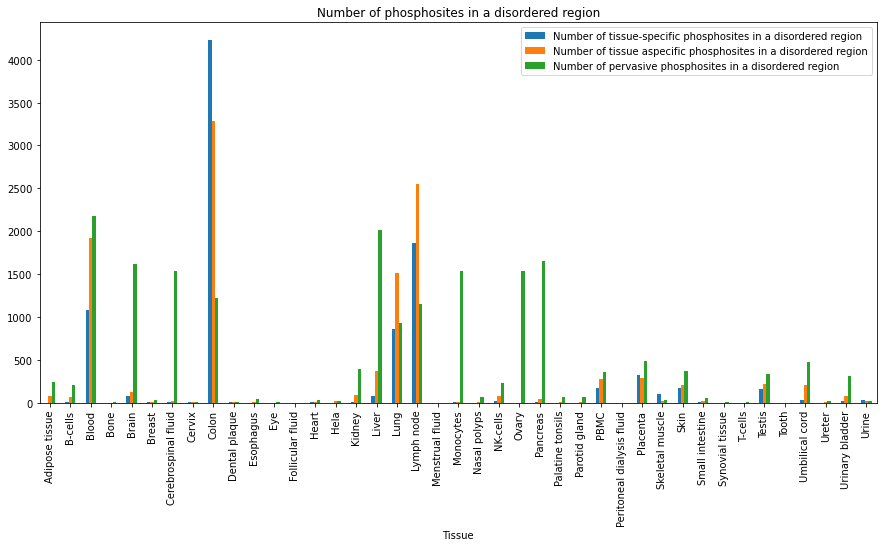

In [19]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    loc_tspec = tspec_sites_mobi.loc[tspec_sites_mobi[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_taspec = taspec_sites_mobi.loc[taspec_sites_mobi[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_gen = gen_sites_mobi.loc[gen_sites_mobi[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    count_tspec = loc_tspec["ACC_ID"].count()
    count_taspec = loc_taspec["ACC_ID"].count()
    count_gen = loc_gen["ACC_ID"].count()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues = pd.DataFrame({"Tissue": list_tissues_STY, "Number of tissue-specific phosphosites in a disordered region": tspec_counts,
                             "Number of tissue aspecific phosphosites in a disordered region": taspec_counts,
                             "Number of pervasive phosphosites in a disordered region": gen_counts})
distr_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphosites in a disordered region")
#plt.savefig("WP2 MobiDB_tissues_phosphosites.png", format="png", bbox_inches="tight")

In [20]:
distr_tissues

,Tissue,Number of tissue-specific phosphosites in a disordered region,Number of tissue aspecific phosphosites in a disordered region,Number of pervasive phosphosites in a disordered region
0,Adipose tissue,0,84,245
1,B-cells,14,69,202
2,Blood,1081,1925,2172
3,Bone,0,1,4
4,Brain,81,128,1615
5,Breast,7,6,34
6,Cerebrospinal fluid,5,17,1539
7,Cervix,5,4,7
8,Colon,4225,3281,1222
9,Dental plaque,6,4,11


In [21]:
#distr_tissues.to_csv("2.3 number of phosphosites in each category per tissue in disordered regions", sep="\t")

In [22]:
missing_tspec = pd.merge(t_spec_sites, tspec_sites_mobi, how="outer", on=["ACC_ID", "UP_POS"], indicator=True)
missing_tspec = missing_tspec[missing_tspec["_merge"]=="left_only"]
print(missing_tspec["ACC_ID"].nunique())
print(missing_tspec.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
missing_tspec.drop(["feature", "start..end", "content_fraction",
                  "content_count", "length", "_merge"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_tspec.drop([tissue+"_y"], axis=1, inplace=True)
missing_tspec.drop(["Total_y"], axis=1, inplace=True)
missing_tspec

2472
4707


,ACC_ID,UP_POS,tissue_x,modres_x,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,...,T-cells_x,Testis_x,Tooth_x,Umbilical cord_x,Ureter_x,Urinary bladder_x,Urine_x,Total_x,tissue_y,modres_y
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,NaN,NaN
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29571,Q9Y6R7,4801,"Small intestine,Small intestine,Small intestin...",Y,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
29572,Q9Y6R7,5062,"Small intestine,Small intestine,Small intestin...",T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
29588,Q9Y6W5,103,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
29589,Q9Y6W5,104,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN


In [23]:
missing_nontspec = pd.merge(non_t_spec_sites, taspec_sites_mobi, how="outer", on=["ACC_ID", "UP_POS"], indicator=True)
missing_nontspec = missing_nontspec[missing_nontspec["_merge"]=="left_only"]
print(missing_nontspec["ACC_ID"].nunique())
print(missing_nontspec.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
missing_nontspec.drop(["feature", "start..end", "content_fraction",
                  "content_count", "length", "_merge"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_nontspec.drop([tissue+"_y"], axis=1, inplace=True)
missing_nontspec.drop(["Total_y"], axis=1, inplace=True)
missing_nontspec.head()

1099
1899


,ACC_ID,UP_POS,tissue_x,modres_x,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,...,T-cells_x,Testis_x,Tooth_x,Umbilical cord_x,Ureter_x,Urinary bladder_x,Urine_x,Total_x,tissue_y,modres_y
0,A0A0C4DH36,108,"Lung,Blood,Blood",T,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,NaN,NaN
1,A0AVK6,71,"Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,NaN,NaN
14,A0M8Q6,31,"Nasal polyps, Palatine tonsils, Parotid gland,...",S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,NaN,NaN
23,A1L390,76,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,NaN,NaN
26,A3KN83,214,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,NaN,NaN


In [24]:
missing_genP = pd.merge(general_P_sites, gen_sites_mobi, how="outer", on=["ACC_ID", "UP_POS"], indicator=True)
missing_genP = missing_genP[missing_genP["_merge"]=="left_only"]
print(missing_genP["ACC_ID"].nunique())
print(missing_genP.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
missing_genP.drop(["feature", "start..end", "content_fraction",
                  "content_count", "length", "_merge"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_genP.drop([tissue+"_y"], axis=1, inplace=True)
missing_genP.drop(["Total_y"], axis=1, inplace=True)
missing_genP.head()

527
1037


,ACC_ID,UP_POS,tissue_x,modres_x,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,...,T-cells_x,Testis_x,Tooth_x,Umbilical cord_x,Ureter_x,Urinary bladder_x,Urine_x,Total_x,tissue_y,modres_y
0,A0A0C4DH39,51,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,7,NaN,NaN
5,A5A3E0,939,"Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,11,NaN,NaN
6,A5A3E0,940,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",Y,1,0,1,0,1,0,...,0,1,0,1,0,0,0,13,NaN,NaN
7,A5A3E0,971,"Liver,PBMC,PBMC,Urinary bladder, Colon, Kidney...",S,0,0,1,0,1,0,...,0,0,0,0,0,1,0,15,NaN,NaN
8,A5A3E0,1062,"Breast,Breast,Breast,Breast,Breast,Breast,Brea...",Y,1,0,0,0,0,1,...,0,0,0,1,0,0,0,6,NaN,NaN


We add the amount of missing proteins, per tissue, per category, to the dataframe that contains the number of proteins in each of the three categories. The loss of proteins seems to be spreadin accordance to the number of proteins identified as being tissue-specific, tissue aspecific and pervasively phosphorylated proteins.

In [25]:
list_missing_tspec = []
list_missing_nontspec = []
list_missing_genP = []
list_all_tspec = []
list_all_genP = []
for tissue in list_tissues_STY:
    tissue=tissue+"_x"
    count_missing_tspec = missing_tspec[tissue].sum()
    count_missing_nontspec = missing_nontspec[tissue].sum()
    count_missing_genP = missing_genP[tissue].sum()
    list_missing_tspec.append(count_missing_tspec)
    list_missing_nontspec.append(count_missing_nontspec)
    list_missing_genP.append(count_missing_genP)
missing = pd.read_csv("number of three categories per tissue_sites.tsv", sep="\t")
missing["tissue-specific phosphosites outside a disordered region"] = list_missing_tspec
missing["tissue aspecific phosphosites outside a disordered region"] = list_missing_nontspec
missing["pervasive phosphosites outside a disordered region"] = list_missing_genP

<AxesSubplot:title={'center':'Phosphosites not occuring in a disordered region'}, xlabel='Tissue'>

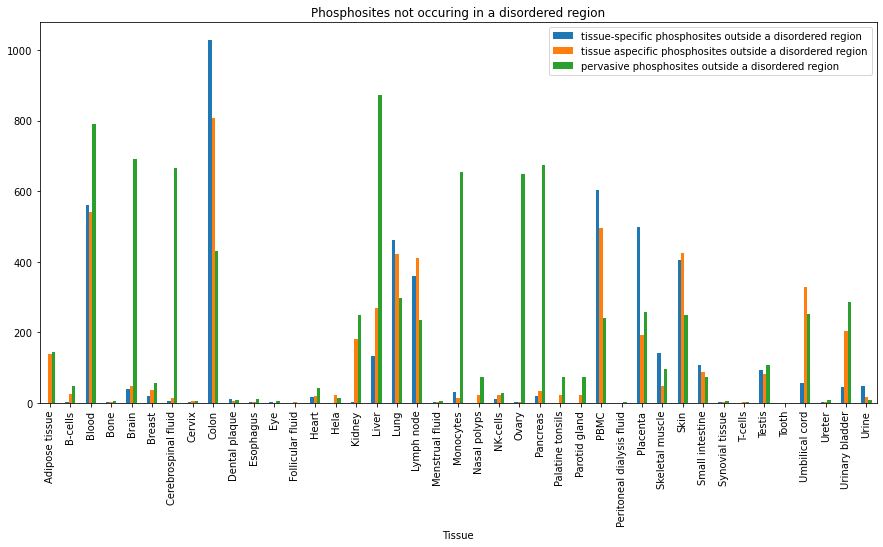

In [26]:
missing[["Tissue", "tissue-specific phosphosites outside a disordered region", "tissue aspecific phosphosites outside a disordered region", "pervasive phosphosites outside a disordered region"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Phosphosites not occuring in a disordered region")

In [27]:
missing

,Tissue,number of tissue-specific sites,number of non tissue-specific sites,number of generally expressed sites,Total,tissue-specific phosphosites outside a disordered region,tissue aspecific phosphosites outside a disordered region,pervasive phosphosites outside a disordered region
0,Adipose tissue,0,221,390,611,0,137,145
1,B-cells,16,95,250,361,2,26,48
2,Blood,1642,2466,2961,7069,561,541,789
3,Bone,2,2,9,13,2,1,5
4,Brain,121,176,2307,2604,40,48,692
5,Breast,26,42,89,157,19,36,55
6,Cerebrospinal fluid,9,30,2203,2242,4,13,664
7,Cervix,7,8,13,28,2,4,6
8,Colon,5252,4089,1651,10992,1027,808,429
9,Dental plaque,17,9,18,44,11,5,7


<AxesSubplot:title={'center':'Comparison of annotated tissue-specific phosphosites compared to non annotated'}, xlabel='Tissue'>

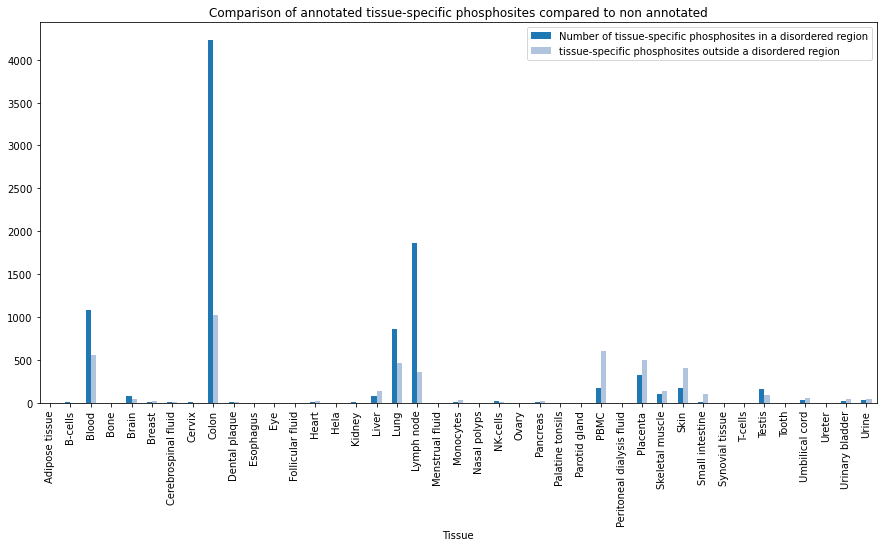

In [28]:
distr_tissues_comp = pd.merge(distr_tissues, missing[["Tissue","tissue-specific phosphosites outside a disordered region", 
                                                     "tissue aspecific phosphosites outside a disordered region",
                                                     "pervasive phosphosites outside a disordered region"]], how="inner", on="Tissue")
distr_tissues_tspec = distr_tissues_comp[["Tissue", "Number of tissue-specific phosphosites in a disordered region", "tissue-specific phosphosites outside a disordered region"]].copy()
distr_tissues_taspec = distr_tissues_comp[["Tissue", "Number of tissue aspecific phosphosites in a disordered region", "tissue aspecific phosphosites outside a disordered region"]]
distr_tissues_gen = distr_tissues_comp[["Tissue", "Number of pervasive phosphosites in a disordered region", "pervasive phosphosites outside a disordered region"]]


distr_tissues_tspec.plot(kind="bar", x="Tissue", color=["tab:blue", "lightsteelblue"], figsize=(15,7), title="Comparison of annotated tissue-specific phosphosites compared to non annotated")

<AxesSubplot:title={'center':'Comparison of annotated tissue aspecific phosphosites compared to non annotated'}, xlabel='Tissue'>

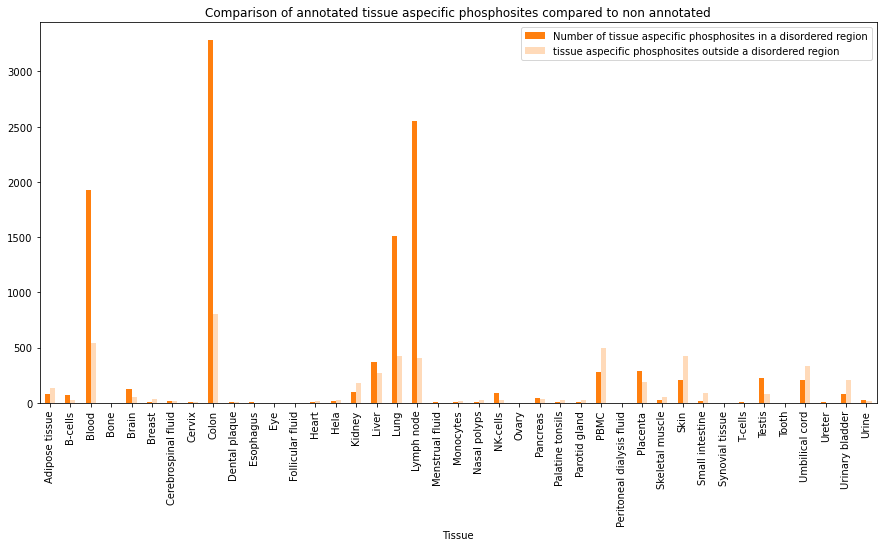

In [29]:
distr_tissues_taspec.plot(kind="bar", x="Tissue", color=["tab:orange","peachpuff"], figsize=(15,7), title="Comparison of annotated tissue aspecific phosphosites compared to non annotated")

<AxesSubplot:title={'center':'Comparison of annotated pervasive phosphosites to non annotated'}, xlabel='Tissue'>

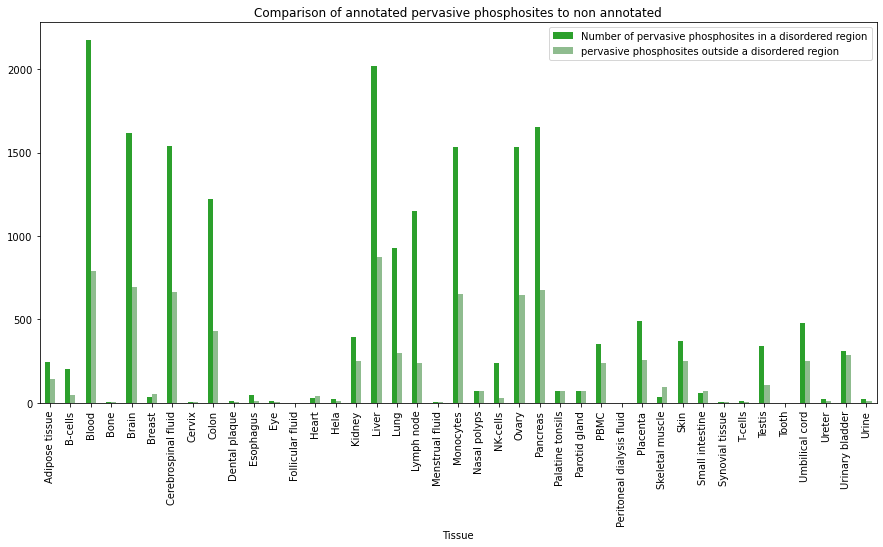

In [30]:
distr_tissues_gen.plot(kind="bar", x="Tissue", color=["tab:green", "darkseagreen"], figsize=(15,7), title="Comparison of annotated pervasive phosphosites to non annotated")

<Figure size 1080x432 with 0 Axes>

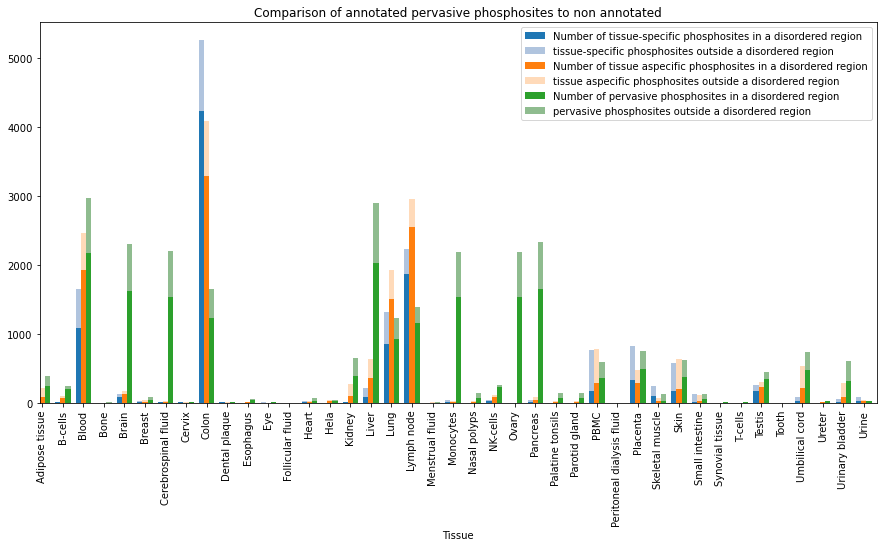

In [31]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
distr_tissues_tspec.plot(kind="bar", x="Tissue", ax=ax, position=1.5, stacked=True, width=0.25, color=["tab:blue", "lightsteelblue"], figsize=(15,7), title="Comparison of annotated tissue-specific phosphosites compared to non annotated")
distr_tissues_taspec.plot(kind="bar", x="Tissue", ax=ax, position=0.5, stacked=True, width=0.25, color=["tab:orange","peachpuff"], figsize=(15,7), title="Comparison of annotated tissue aspecific phosphosites compared to non annotated")
distr_tissues_gen.plot(kind="bar", x="Tissue", ax=ax, position=-0.5, stacked=True, width=0.25, color=["tab:green", "darkseagreen"], figsize=(15,7), title="Comparison of annotated pervasive phosphosites to non annotated")
#plt.savefig("WP2 MobiDB_missing_annotated_sites_per_tissue.png", format="png", bbox_inches="tight")
plt.show()

<Figure size 1080x432 with 0 Axes>

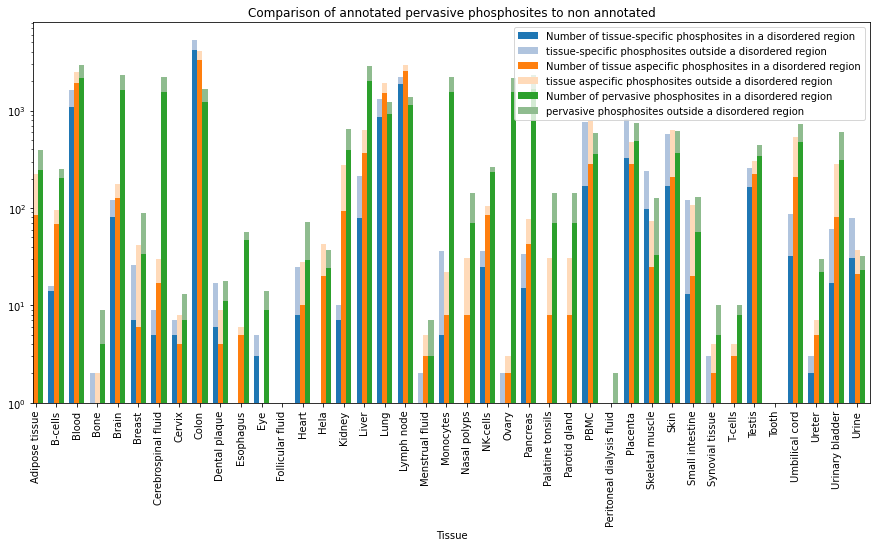

In [32]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
distr_tissues_tspec.plot(kind="bar", x="Tissue", logy=True, ax=ax, position=1.5, stacked=True, width=0.25, color=["tab:blue", "lightsteelblue"], figsize=(15,7), title="Comparison of annotated tissue-specific phosphosites compared to non annotated")
distr_tissues_taspec.plot(kind="bar", x="Tissue", logy=True, ax=ax, position=0.5, stacked=True, width=0.25, color=["tab:orange","peachpuff"], figsize=(15,7), title="Comparison of annotated tissue aspecific phosphosites compared to non annotated")
distr_tissues_gen.plot(kind="bar", x="Tissue", logy=True, ax=ax, position=-0.5, stacked=True, width=0.25, color=["tab:green", "darkseagreen"], figsize=(15,7), title="Comparison of annotated pervasive phosphosites to non annotated")
#plt.savefig("WP2 MobiDB_missing_annotated_sites_per_tissue_lof.png", format="png", bbox_inches="tight")
plt.show()

## Number of sites having disordered regions per category

We'll now, for each category, calculate how many proteins are annotated with a disordered region. Despite there being less pervasively phorphorylated proteins, they are much better represented.

<AxesSubplot:title={'center':'Number of annotated phosphosites compared to non annotated ones per category'}, xlabel='Label'>

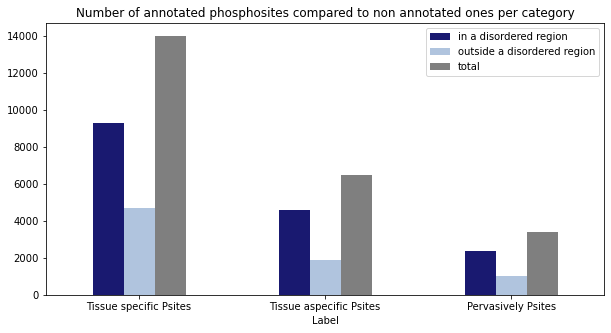

In [33]:
annotated = [tspec_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["UP_POS"].count().shape[0], taspec_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["UP_POS"].count().shape[0], gen_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["UP_POS"].count().shape[0]]
             
missed = [missing_tspec.groupby(["ACC_ID", "UP_POS"], as_index=False)["UP_POS"].count().shape[0],
          missing_nontspec.groupby(["ACC_ID", "UP_POS"], as_index=False)["UP_POS"].count().shape[0],
          missing_genP.groupby(["ACC_ID", "UP_POS"], as_index=False)["UP_POS"].count().shape[0]]

total = [annotated[0]+missed[0], annotated[1]+missed[1], annotated[2]+missed[2]]

three_cat = pd.DataFrame({"Label": ["Tissue specific Psites", "Tissue aspecific Psites",
                                   "Pervasively Psites"], "in a disordered region": annotated, "outside a disordered region": missed, "total":total})
three_cat.plot(kind="bar", x="Label" ,color=["midnightblue", "lightsteelblue", "tab:grey"], figsize=(10,5), title="Number of annotated phosphosites compared to non annotated ones per category", rot=0)
#plt.savefig("WP2 MobiDB_ratio_phosphosites_per_cat.png", format="png", bbox_inches="tight")

In [34]:
three_cat["ratio_annotated"] = three_cat["in a disordered region"]*100/three_cat["total"]
three_cat

,Label,in a disordered region,outside a disordered region,total,ratio_annotated
0,Tissue specific Psites,9312,4707,14019,66.424139
1,Tissue aspecific Psites,4579,1899,6478,70.685397
2,Pervasively Psites,2369,1037,3406,69.553729


In [35]:
tspec_sites_mobi = pd.merge(t_spec_sites, proteins_mobi, on=["ACC_ID"], how="inner")
print(tspec_sites_mobi["ACC_ID"].nunique())
taspec_sites_mobi = pd.merge(non_t_spec_sites, proteins_mobi, on=["ACC_ID"], how="inner")
print(taspec_sites_mobi["ACC_ID"].nunique())
gen_sites_mobi = pd.merge(general_P_sites, proteins_mobi, on=["ACC_ID"], how="inner")
print(gen_sites_mobi["ACC_ID"].nunique())

Uniprot = pd.read_csv("UniprotKB_GO_human_mannually annotated.tab", sep="\t")
Uniprot.rename({"Entry": "ACC_ID"}, axis=1, inplace=True)
Uniprot_mobi = pd.merge(Uniprot["ACC_ID"], mobi, on=["ACC_ID"], how="inner")
print(Uniprot_mobi["ACC_ID"].nunique())

4971
2715
1368
20224


# Proteins having tissue-specific phosphosites

In [36]:
print(t_spec_sites.shape[0])
print(t_spec_sites["ACC_ID"].nunique())
tspec_sites_mobi = pd.merge(t_spec_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(tspec_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspec_sites_mobi["ACC_ID"].nunique())
tspec_sites_mobi.head()

14019
4977
9312
3388


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-mobidb_lite,1..108,1.000,108,108
1,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iupl,1..108,1.000,108,108
2,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iups,"1..33,37..51,53..108",0.963,104,108
3,A0A1B0GTU1,491,Colon,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-mobidb_lite,"140..194,223..351,364..433,449..468,481..506,7...",0.486,391,805
4,A0A1B0GTU1,491,Colon,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iupl,"100..200,216..216,220..433,437..437,443..511,5...",0.733,590,805


In [37]:
tspec_proteins = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
print(tspec_proteins.shape[0])
taspec_proteins = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
print(taspec_proteins.shape[0])
gen_proteins = pd.read_csv("1.1 general P proteins", sep="\t")
print(gen_proteins.shape[0])

2029
2074
1752


In [38]:
tspec_sites_mobi = pd.merge(t_spec_sites, proteins_mobi_sub_tot, on=["ACC_ID", "UP_POS"], how="inner")
tspecsites_tspecproteins_mobi = pd.merge(tspec_sites_mobi, tspec_proteins["ACC_ID"], on=["ACC_ID"], how="inner")
tspecsites_tspecproteins_mobi.head()

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-mobidb_lite,1..108,1.000,108,108
1,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iupl,1..108,1.000,108,108
2,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iups,"1..33,37..51,53..108",0.963,104,108
3,A0A1B0GTU1,491,Colon,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-mobidb_lite,"140..194,223..351,364..433,449..468,481..506,7...",0.486,391,805
4,A0A1B0GTU1,491,Colon,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iupl,"100..200,216..216,220..433,437..437,443..511,5...",0.733,590,805


In [39]:
tspecsites_taspecproteins_mobi = pd.merge(tspec_sites_mobi, taspec_proteins["ACC_ID"], on=["ACC_ID"], how="inner")
tspecsites_taspecproteins_mobi.head()

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0AVK6,68,"Colon,Colon,Colon",S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iupl,"1..31,33..62,68..70,77..85,94..96,99..110,112....",0.506,439,867
1,A0AVK6,68,"Colon,Colon,Colon",S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iups,"1..10,12..12,20..22,28..29,33..34,36..64,68..6...",0.353,306,867
2,A0JLT2,192,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-mobidb_lite,"1..56,171..244",0.533,130,244
3,A0JLT2,192,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iups,"1..57,120..120,161..244",0.582,142,244
4,A0JLT2,192,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iupl,"2..56,59..65,71..71,77..84,104..104,108..145,1...",0.852,208,244


In [40]:
tspecsites_genproteins_mobi = pd.merge(tspec_sites_mobi, gen_proteins["ACC_ID"], on=["ACC_ID"], how="inner")
tspecsites_genproteins_mobi.head()

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0FGR8,736,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
1,A0FGR8,736,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921
2,A0FGR8,736,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iupl,"1..34,37..45,47..104,519..521,552..572,576..57...",0.353,325,921
3,A0FGR8,737,Colon,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
4,A0FGR8,737,Colon,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921


In [41]:
print(tspecsites_tspecproteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspecsites_taspecproteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspecsites_genproteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])

1548
3420
4344


<AxesSubplot:title={'center':'Number of tissue-specific phosphosites in a disordered region'}, xlabel='Tissue'>

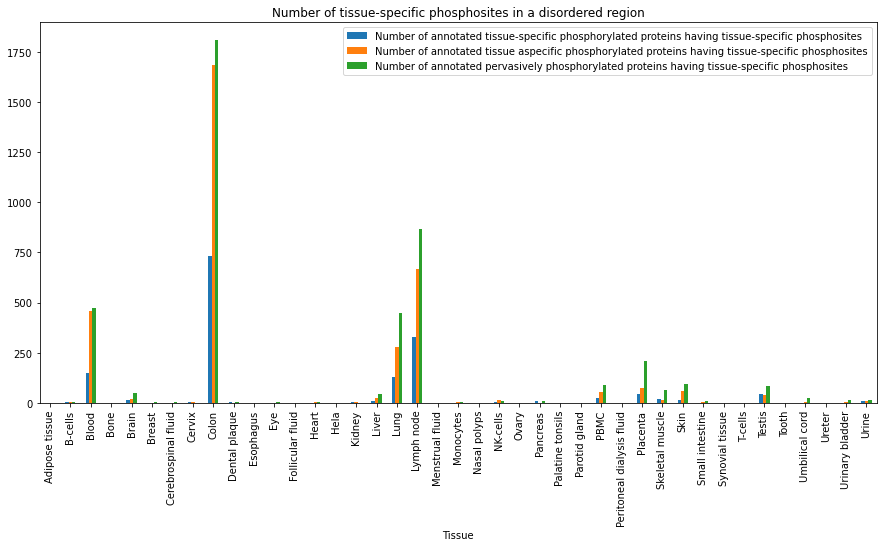

In [42]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    loc_tspec = tspecsites_tspecproteins_mobi.loc[tspecsites_tspecproteins_mobi[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_taspec = tspecsites_taspecproteins_mobi.loc[tspecsites_taspecproteins_mobi[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_gen = tspecsites_genproteins_mobi.loc[tspecsites_genproteins_mobi[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    count_tspec = loc_tspec["ACC_ID"].count()
    count_taspec = loc_taspec["ACC_ID"].count()
    count_gen = loc_gen["ACC_ID"].count()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues = pd.DataFrame({"Tissue": list_tissues_STY, "Number of annotated tissue-specific phosphorylated proteins having tissue-specific phosphosites": tspec_counts,
                             "Number of annotated tissue aspecific phosphorylated proteins having tissue-specific phosphosites": taspec_counts,
                             "Number of annotated pervasively phosphorylated proteins having tissue-specific phosphosites": gen_counts})
distr_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of tissue-specific phosphosites in a disordered region")

In [43]:
tspec_sites_tspecproteins = pd.merge(t_spec_sites, tspec_proteins, on=["ACC_ID"], how="inner")
missing_tspec = pd.merge(tspec_sites_tspecproteins, tspecsites_tspecproteins_mobi, how="outer", on=["ACC_ID", "UP_POS"], indicator=True)
missing_tspec = missing_tspec[missing_tspec["_merge"]=="left_only"]
print(missing_tspec["ACC_ID"].nunique())
print(missing_tspec.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
missing_tspec.drop(["feature", "start..end", "content_fraction",
                  "content_count", "length", "_merge"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_tspec.drop([tissue+"_y"], axis=1, inplace=True)
missing_tspec.drop(["Total_y"], axis=1, inplace=True)
missing_tspec

1023
1246


,ACC_ID,UP_POS,tissue_x,modres_x,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,Q9Y6N5,376,Liver,Y,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5118,Q9Y6R7,224,Small intestine,S,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5119,Q9Y6R7,4801,"Small intestine,Small intestine,Small intestin...",Y,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5120,Q9Y6R7,5062,"Small intestine,Small intestine,Small intestin...",T,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
tspec_sites_taspecproteins = pd.merge(t_spec_sites, taspec_proteins, on=["ACC_ID"], how="inner")
missing_nontspec = pd.merge(tspec_sites_taspecproteins, tspecsites_taspecproteins_mobi, how="outer", on=["ACC_ID", "UP_POS"], indicator=True)
missing_nontspec = missing_nontspec[missing_nontspec["_merge"]=="left_only"]
print(missing_nontspec["ACC_ID"].nunique())
print(missing_nontspec.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
missing_nontspec.drop(["feature", "start..end", "content_fraction",
                  "content_count", "length", "_merge"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_nontspec.drop([tissue+"_y"], axis=1, inplace=True)
missing_nontspec.drop(["Total_y"], axis=1, inplace=True)
missing_nontspec.head()

741
1569


,ACC_ID,UP_POS,tissue_x,modres_x,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
27,A1KXE4,185,Colon,T,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,A1L390,423,"Colon,Colon",S,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,A1L390,741,Colon,S,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,A4UGR9,3042,Skeletal muscle,S,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,A6ND36,356,"Colon,Colon,Colon",S,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
tspec_sites_genproteins = pd.merge(t_spec_sites, gen_proteins, on=["ACC_ID"], how="inner")
missing_genP = pd.merge(tspec_sites_genproteins, tspecsites_genproteins_mobi, how="outer", on=["ACC_ID", "UP_POS"], indicator=True)
missing_genP = missing_genP[missing_genP["_merge"]=="left_only"]
print(missing_genP["ACC_ID"].nunique())
print(missing_genP.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
missing_genP.drop(["feature", "start..end", "content_fraction",
                  "content_count", "length", "_merge"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_genP.drop([tissue+"_y"], axis=1, inplace=True)
missing_genP.drop(["Total_y"], axis=1, inplace=True)
missing_genP.head()

708
1892


,ACC_ID,UP_POS,tissue_x,modres_x,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
18,A0JNW5,933,Lymph node,S,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,A0JNW5,939,Blood,S,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,A0JNW5,953,Lymph node,S,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,A5A3E0,949,Skeletal muscle,T,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,A6NEL2,740,"Colon,Colon,Colon,Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Tissue-specific phosphosites not occuring in a disordered region'}, xlabel='Tissue'>

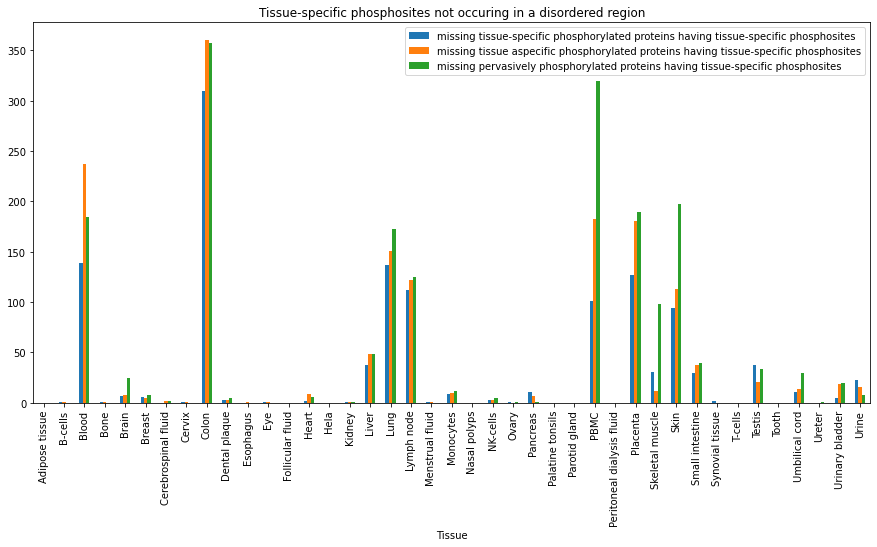

In [46]:
list_missing_tspec = []
list_missing_nontspec = []
list_missing_genP = []
list_all_tspec = []
list_all_genP = []
for tissue in list_tissues_STY:
    tissue=tissue+"_x"
    count_missing_tspec = missing_tspec[tissue].sum()
    count_missing_nontspec = missing_nontspec[tissue].sum()
    count_missing_genP = missing_genP[tissue].sum()
    list_missing_tspec.append(count_missing_tspec)
    list_missing_nontspec.append(count_missing_nontspec)
    list_missing_genP.append(count_missing_genP)
missing = pd.read_csv("number of three categories per tissue_sites.tsv", sep="\t")
missing["missing tissue-specific phosphorylated proteins having tissue-specific phosphosites"] = list_missing_tspec
missing["missing tissue aspecific phosphorylated proteins having tissue-specific phosphosites"] = list_missing_nontspec
missing["missing pervasively phosphorylated proteins having tissue-specific phosphosites"] = list_missing_genP

missing[["Tissue", "missing tissue-specific phosphorylated proteins having tissue-specific phosphosites", "missing tissue aspecific phosphorylated proteins having tissue-specific phosphosites", "missing pervasively phosphorylated proteins having tissue-specific phosphosites"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Tissue-specific phosphosites not occuring in a disordered region")

In [47]:
distr_tissues_comp = pd.merge(distr_tissues, missing[["Tissue","missing tissue-specific phosphorylated proteins having tissue-specific phosphosites", 
                                                     "missing tissue aspecific phosphorylated proteins having tissue-specific phosphosites",
                                                     "missing pervasively phosphorylated proteins having tissue-specific phosphosites"]], how="inner", on="Tissue")
distr_tissues_tspec = distr_tissues_comp[["Tissue", "Number of annotated tissue-specific phosphorylated proteins having tissue-specific phosphosites", "missing tissue-specific phosphorylated proteins having tissue-specific phosphosites"]].copy()
distr_tissues_taspec = distr_tissues_comp[["Tissue", "Number of annotated tissue aspecific phosphorylated proteins having tissue-specific phosphosites", "missing tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]]
distr_tissues_gen = distr_tissues_comp[["Tissue", "Number of annotated pervasively phosphorylated proteins having tissue-specific phosphosites", "missing pervasively phosphorylated proteins having tissue-specific phosphosites"]]

<AxesSubplot:title={'center':'Comparison of annotated tissue-specific phosphorylated proteins having tissue-specific phosphosites compared to non annotated'}, xlabel='Tissue'>

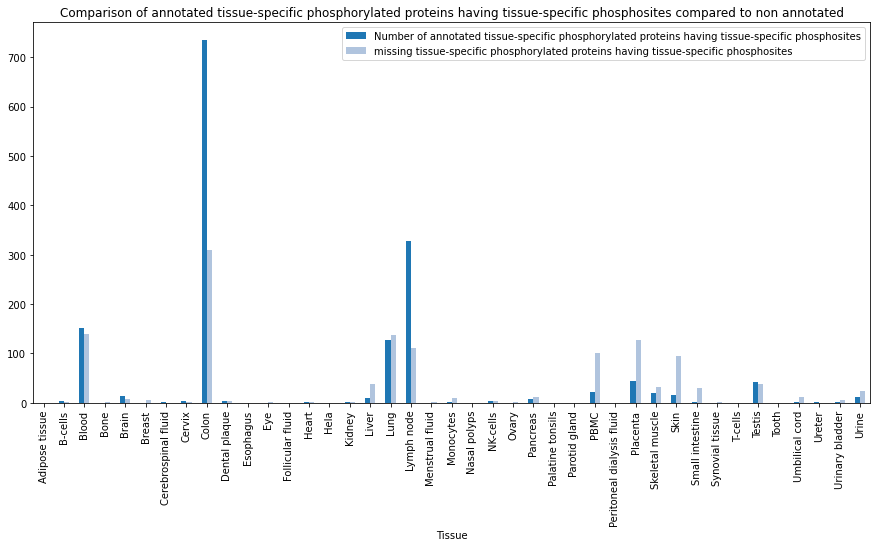

In [48]:
distr_tissues_tspec.plot(kind="bar", x="Tissue", color=["tab:blue", "lightsteelblue"], figsize=(15,7), title="Comparison of annotated tissue-specific phosphorylated proteins having tissue-specific phosphosites compared to non annotated")

<AxesSubplot:title={'center':'Comparison of annotated tissue aspecific phosphorylated proteins having tissue-specific phosphosites compared to non annotated'}, xlabel='Tissue'>

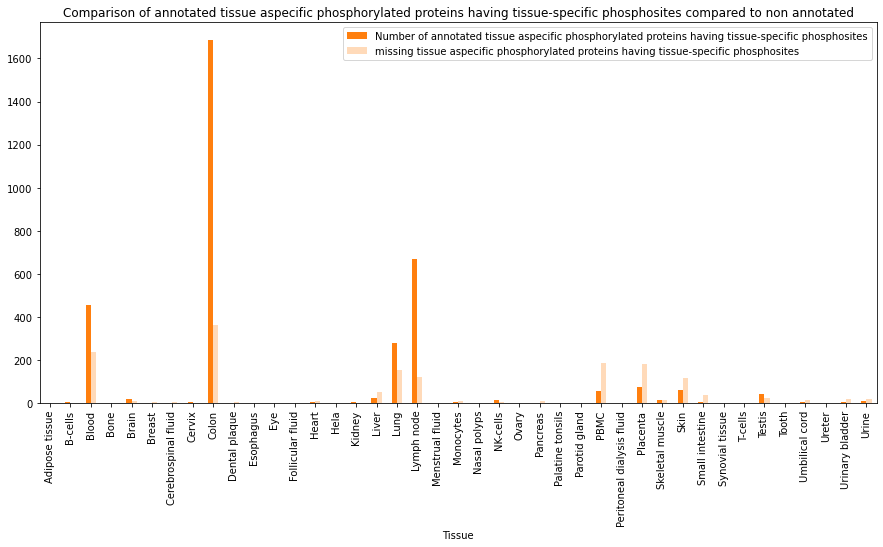

In [49]:
distr_tissues_taspec.plot(kind="bar", x="Tissue", color=["tab:orange","peachpuff"], figsize=(15,7), title="Comparison of annotated tissue aspecific phosphorylated proteins having tissue-specific phosphosites compared to non annotated")

<AxesSubplot:title={'center':'Comparison of annotated pervasively phosphorylated proteins having tissue-specific phosphosites to non annotated'}, xlabel='Tissue'>

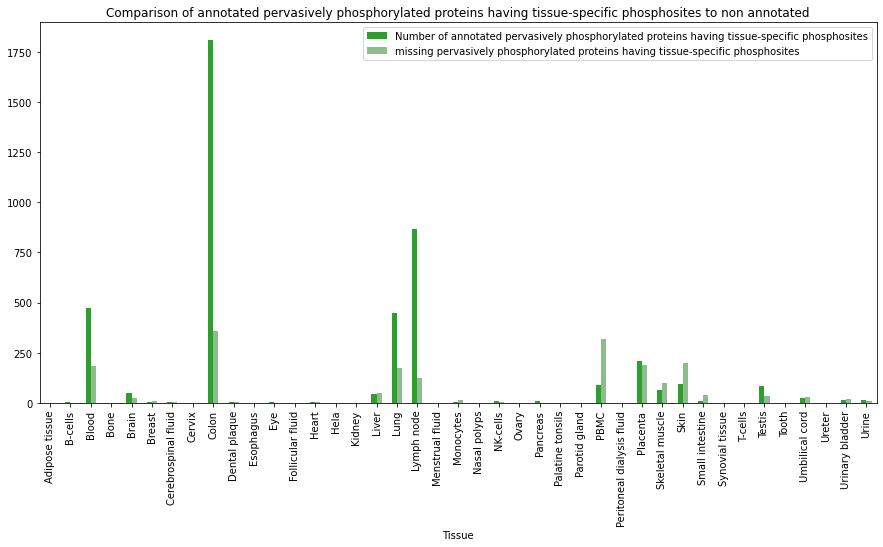

In [50]:
distr_tissues_gen.plot(kind="bar", x="Tissue", color=["tab:green", "darkseagreen"], figsize=(15,7), title="Comparison of annotated pervasively phosphorylated proteins having tissue-specific phosphosites to non annotated")

<AxesSubplot:title={'center':'Number of annotated tissue-specific phosphosites compared to non annotated ones per category'}, xlabel='Label'>

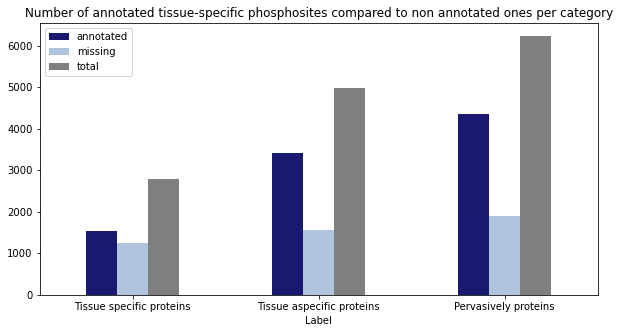

In [51]:
annotated = [tspecsites_tspecproteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["UP_POS"].count().shape[0], tspecsites_taspecproteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["UP_POS"].count().shape[0], tspecsites_genproteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["UP_POS"].count().shape[0]]
             
missed = [missing_tspec.groupby(["ACC_ID", "UP_POS"], as_index=False)["UP_POS"].count().shape[0],
          missing_nontspec.groupby(["ACC_ID", "UP_POS"], as_index=False)["UP_POS"].count().shape[0],
          missing_genP.groupby(["ACC_ID", "UP_POS"], as_index=False)["UP_POS"].count().shape[0]]

total = [annotated[0]+missed[0], annotated[1]+missed[1], annotated[2]+missed[2]]

three_cat = pd.DataFrame({"Label": ["Tissue specific proteins", "Tissue aspecific proteins",
                                   "Pervasively proteins"], "annotated": annotated, "missing": missed, "total":total})
three_cat.plot(kind="bar", x="Label" ,color=["midnightblue", "lightsteelblue", "tab:grey"], figsize=(10,5), title="Number of annotated tissue-specific phosphosites compared to non annotated ones per category", rot=0)
#plt.savefig("WP2 MobiDB_ratio_annotated_tissue-specific phosphosites.png", format="png", bbox_inches="tight")

In [52]:
three_cat["ratio_annotated"] = three_cat["annotated"]*100/three_cat["total"]
three_cat

,Label,annotated,missing,total,ratio_annotated
0,Tissue specific proteins,1548,1246,2794,55.404438
1,Tissue aspecific proteins,3420,1569,4989,68.550812
2,Pervasively proteins,4344,1892,6236,69.660038


In [53]:
print(three_cat["total"].sum())

14019


# Proteins with interaction interfaces

See also: https://www.mobidb.org/about/mobidb

In [54]:
mobi = mobi1[(((mobi1["feature"].str.contains("lip"))|
               (mobi1["feature"].str.contains("binding_mode")))&(mobi1["feature"].str.contains("prediction")==False))]
mobi.rename({"acc": "ACC_ID"}, inplace=True, axis=1)
print(mobi.shape[0])
mobi.head()

27307


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ACC_ID,feature,start..end,content_fraction,content_count,length
3531,A0A7P0Z4D3,homology-lip-ideal,328..378,0.059,51,870
3532,A0A7P0Z4D3,homology-lip-merge,328..378,0.059,51,870
3536,A0A7P0Z4D3,homology-lip-priority,328..378,0.059,51,870
3744,A0A7P0T9D7,homology-lip-dibs,21..39,0.006,19,3418
3745,A0A7P0T9D7,homology-lip-disprot,21..39,0.006,19,3418


In [55]:
mobi1[(((mobi1["feature"].str.contains("lip")==False)&(mobi1["feature"].str.contains("derived-binding_mode")==False)&
            (mobi1["feature"].str.contains("curated-disorder-to-disorder-fuzdb")==False)&
       (mobi1["feature"].str.contains("homology-binding_mode")==False)&
       (mobi1["feature"].str.contains("curated-binding_mode")==False))&
            (mobi1["feature"].str.contains("prediction")==False))]["feature"].value_counts()

homology-domain-merge                               57280
homology-domain-pfam                                53966
homology-domain-gene3d                              29775
derived-observed-th_90                               7269
derived-observed-priority                            7204
derived-missing_residues-th_90                       5448
derived-missing_residues_context_dependent-th_90     5045
derived-missing_residues-priority                    4906
derived-mobile_context_dependent-th_90               1974
derived-mobile-th_90                                 1803
curated-disorder-merge                               1189
curated-disorder-priority                            1189
homology-disorder-merge                              1074
homology-disorder-priority                           1059
homology-disorder-disprot                             823
curated-disorder-disprot                              722
curated-disorder-ideal                                679
homology-confo

In [56]:
data_site= pd.read_csv("site_data", sep="\t")
data_site.head()

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
proteins_mobi = pd.merge(mobi, data_site[["ACC_ID", "UP_POS"]], on="ACC_ID", how="inner")
print(proteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(proteins_mobi["ACC_ID"].nunique())
proteins_mobi.head()

11608
2474


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,32
1,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,39
2,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,47
3,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,65
4,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,66


In [58]:
proteins_mobi1 = proteins_mobi["start..end"].str.split(",", expand=True)

In [59]:
proteins_mobi = pd.merge(proteins_mobi, proteins_mobi1, how="inner", left_index=True, right_index=True)
print(proteins_mobi.shape[0])
proteins_mobi.head()

62117


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS,0,1,2,...,22,23,24,25,26,27,28,29,30,31
0,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,32,240..246,None,None,...,None,None,None,None,None,None,None,None,None,None
1,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,39,240..246,None,None,...,None,None,None,None,None,None,None,None,None,None
2,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,47,240..246,None,None,...,None,None,None,None,None,None,None,None,None,None
3,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,65,240..246,None,None,...,None,None,None,None,None,None,None,None,None,None
4,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,66,240..246,None,None,...,None,None,None,None,None,None,None,None,None,None


In [60]:
proteins_mobi_sub_tot = pd.DataFrame({})
for i in range (32):
    proteins_mobi_sub = proteins_mobi.loc[proteins_mobi["UP_POS"].astype(float, copy=False).between(proteins_mobi[i].str.partition("..")[0].astype(float, copy=False), proteins_mobi[i].str.partition("..")[2].astype(float, copy=False))]
    proteins_mobi_sub_tot = proteins_mobi_sub_tot.append(proteins_mobi_sub, ignore_index=True)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [61]:
for i in range(32):
    proteins_mobi_sub_tot.drop(i, axis=1, inplace=True)
print(proteins_mobi_sub_tot.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(proteins_mobi_sub_tot["ACC_ID"].nunique())
proteins_mobi_sub_tot.head()

2761
885


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P27348,derived-binding_mode_disorder_to_disorder-mobi,232..245,0.057,14,245,232
1,P27348,derived-binding_mode_disorder_to_disorder-prio...,232..245,0.057,14,245,232
2,P22314,derived-binding_mode_disorder_to_disorder-mobi,"1..48,804..815,1058..1058",0.058,61,1058,13
3,P22314,derived-binding_mode_disorder_to_disorder-mobi,"1..48,804..815,1058..1058",0.058,61,1058,46
4,P22314,derived-binding_mode_disorder_to_disorder-prio...,"1..48,804..815,1058..1058",0.058,61,1058,13


In [62]:
t_spec_sites = pd.read_csv("1.2 tissue-specific sites.tsv", sep="\t")
non_t_spec_sites = pd.read_csv("1.2 non tissue-specific sites.tsv", sep="\t")
general_P_sites = pd.read_csv("1.2 general P sites.tsv", sep="\t")

In [63]:
print(t_spec_sites.shape[0])
print(t_spec_sites["ACC_ID"].nunique())
tspec_sites_mobi = pd.merge(t_spec_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(tspec_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspec_sites_mobi["ACC_ID"].nunique())
tspec_sites_mobi.head()

14019
4977
1401
668


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0JLT2,192,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-mobi,"1..62,165..244",0.582,142,244
1,A0JLT2,192,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-prio...,"1..62,165..244",0.582,142,244
2,A0JLT2,194,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-mobi,"1..62,165..244",0.582,142,244
3,A0JLT2,194,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-prio...,"1..62,165..244",0.582,142,244
4,A0JLT2,234,Blood,S,0,0,1,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-mobi,"1..62,165..244",0.582,142,244


In [64]:
print(non_t_spec_sites.shape[0])
print(non_t_spec_sites["ACC_ID"].nunique())
taspec_sites_mobi = pd.merge(non_t_spec_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(taspec_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(taspec_sites_mobi["ACC_ID"].nunique())
taspec_sites_mobi.head()

6478
2718
832
423


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0JLT2,226,"Blood,Blood,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,1,0,0,0,...,0,0,0,0,3,derived-binding_mode_disorder_to_disorder-mobi,"1..62,165..244",0.582,142,244
1,A0JLT2,226,"Blood,Blood,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,1,0,0,0,...,0,0,0,0,3,derived-binding_mode_disorder_to_disorder-prio...,"1..62,165..244",0.582,142,244
2,A6NMY6,12,"PBMC,PBMC,Liver,Lung,Lung,Lymph node",S,0,0,0,0,0,0,...,0,0,0,0,4,homology-lip-disprot,2..33,0.094,32,339
3,A6NMY6,12,"PBMC,PBMC,Liver,Lung,Lung,Lymph node",S,0,0,0,0,0,0,...,0,0,0,0,4,homology-lip-ideal,1..20,0.059,20,339
4,A6NMY6,12,"PBMC,PBMC,Liver,Lung,Lung,Lymph node",S,0,0,0,0,0,0,...,0,0,0,0,4,homology-lip-merge,1..33,0.097,33,339


In [65]:
print(general_P_sites.shape[0])
print(general_P_sites["ACC_ID"].nunique())
gen_sites_mobi = pd.merge(general_P_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(gen_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(gen_sites_mobi["ACC_ID"].nunique())
gen_sites_mobi.head()

3406
1368
528
231


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A6NMY6,18,"Liver,PBMC,PBMC,Skin,Skin,Blood,Blood,Blood,Bl...",S,0,0,1,0,0,0,...,0,0,0,0,8,homology-lip-disprot,2..33,0.094,32,339
1,A6NMY6,18,"Liver,PBMC,PBMC,Skin,Skin,Blood,Blood,Blood,Bl...",S,0,0,1,0,0,0,...,0,0,0,0,8,homology-lip-ideal,1..20,0.059,20,339
2,A6NMY6,18,"Liver,PBMC,PBMC,Skin,Skin,Blood,Blood,Blood,Bl...",S,0,0,1,0,0,0,...,0,0,0,0,8,homology-lip-merge,1..33,0.097,33,339
3,A6NMY6,18,"Liver,PBMC,PBMC,Skin,Skin,Blood,Blood,Blood,Bl...",S,0,0,1,0,0,0,...,0,0,0,0,8,homology-lip-priority,1..33,0.097,33,339
4,A6NMY6,19,"Liver,Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PB...",T,0,0,1,0,0,0,...,1,0,0,0,10,homology-lip-disprot,2..33,0.094,32,339


# Type of feature

We'll now investigate what kind of interactions we're dealing with for each category and per tissue.

<AxesSubplot:title={'center':'Types of features of tissue-specific phosphosites'}, xlabel='feature'>

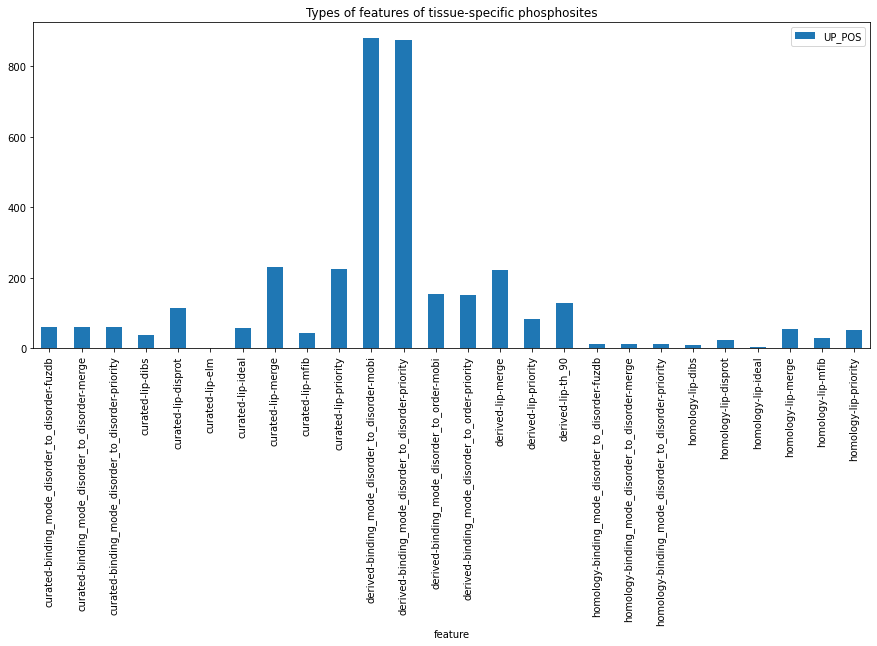

In [66]:
tspec_features = tspec_sites_mobi.groupby(["feature"], as_index=False)["UP_POS"].count()
tspec_features.plot(x="feature", kind="bar", color="tab:blue", figsize=(15,6), title="Types of features of tissue-specific phosphosites")

#There is overlap between the different categories - some proteins are noted with both annotation from Fuzdb and homology, for example

<AxesSubplot:title={'center':'Types of features of tissue aspecific phosphosites'}, xlabel='feature'>

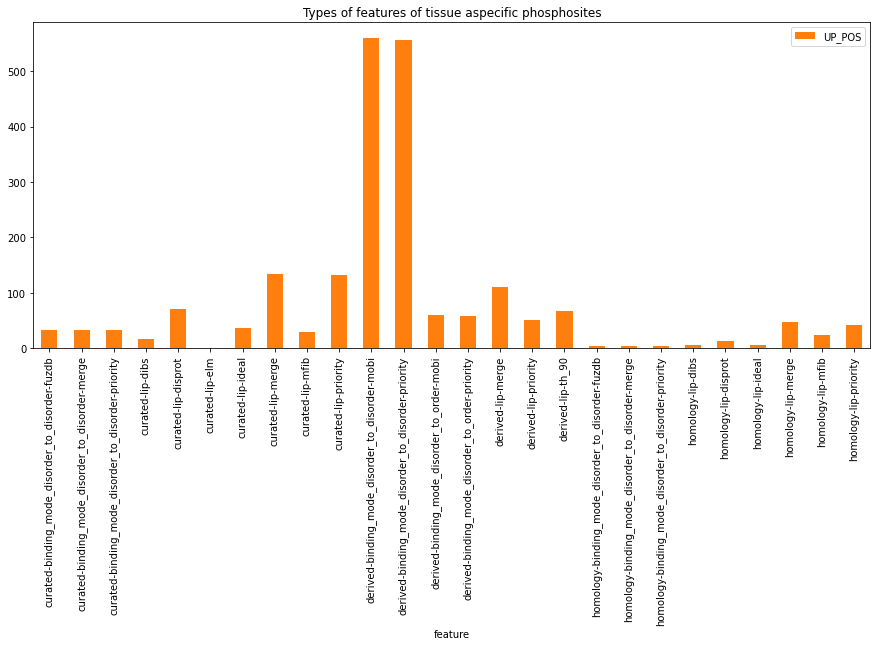

In [67]:
taspec_features = taspec_sites_mobi.groupby(["feature"], as_index=False)["UP_POS"].count()
taspec_features.plot(x="feature", kind="bar", color="tab:orange", figsize=(15,6), title="Types of features of tissue aspecific phosphosites")

#There is overlap between the different categories - some proteins are noted with both annotation from Fuzdb and homology, for example

<AxesSubplot:title={'center':'Types of features of pervasive phosphosites'}, xlabel='feature'>

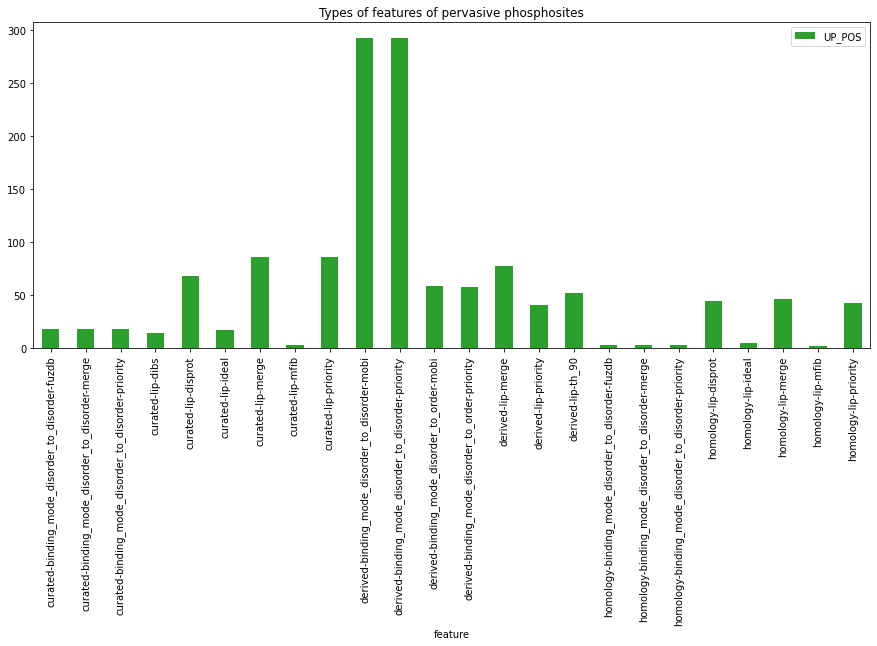

In [68]:
gen_features = gen_sites_mobi.groupby(["feature"], as_index=False)["UP_POS"].count()
gen_features.plot(x="feature", kind="bar", color="tab:green", figsize=(15,6), title="Types of features of pervasive phosphosites")

#There is overlap between the different categories - some proteins are noted with both annotation from Fuzdb and homology, for example

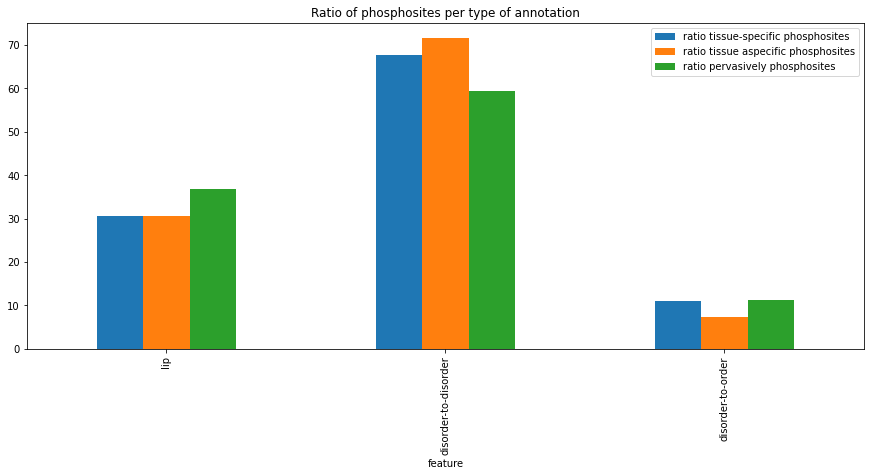

In [69]:
list_tspec = []
list_taspec = []
list_gen = []
for item in ["lip", "disorder_to_disorder", "disorder_to_order"]:
    count_item_tspec = tspec_sites_mobi.loc[tspec_sites_mobi["feature"].str.contains(item), :].groupby(["ACC_ID", "UP_POS"],as_index=False)["length"].mean()["UP_POS"].count()
    count_item_taspec = taspec_sites_mobi.loc[taspec_sites_mobi["feature"].str.contains(item), :].groupby(["ACC_ID", "UP_POS"],as_index=False)["length"].mean()["UP_POS"].count()
    count_item_gen = gen_sites_mobi.loc[gen_sites_mobi["feature"].str.contains(item), :].groupby(["ACC_ID", "UP_POS"],as_index=False)["length"].mean()["UP_POS"].count()
    list_tspec.append(count_item_tspec*100/tspec_sites_mobi.groupby(["ACC_ID", "UP_POS"],as_index=False)["length"].mean()["UP_POS"].count())
    list_taspec.append(count_item_taspec*100/taspec_sites_mobi.groupby(["ACC_ID", "UP_POS"],as_index=False)["length"].mean()["UP_POS"].count())
    list_gen.append(count_item_gen*100/gen_sites_mobi.groupby(["ACC_ID", "UP_POS"],as_index=False)["length"].mean()["UP_POS"].count())
summarised_features = pd.DataFrame({"feature": ["lip", "disorder-to-disorder", "disorder-to-order"],
                                  "ratio tissue-specific phosphosites": list_tspec,
                                  "ratio tissue aspecific phosphosites": list_taspec,
                                  "ratio pervasively phosphosites": list_gen})
summarised_features.plot(kind="bar", x="feature", figsize=(15,6), title="Ratio of phosphosites per type of annotation")
plt.savefig("WP2 MobiDB_ratio_interaction_interfaces_P-sites.png", format="png", bbox_inches="tight")

<AxesSubplot:title={'center':'Phosphosites of each category identified in an interaction interface'}, xlabel='Tissue'>

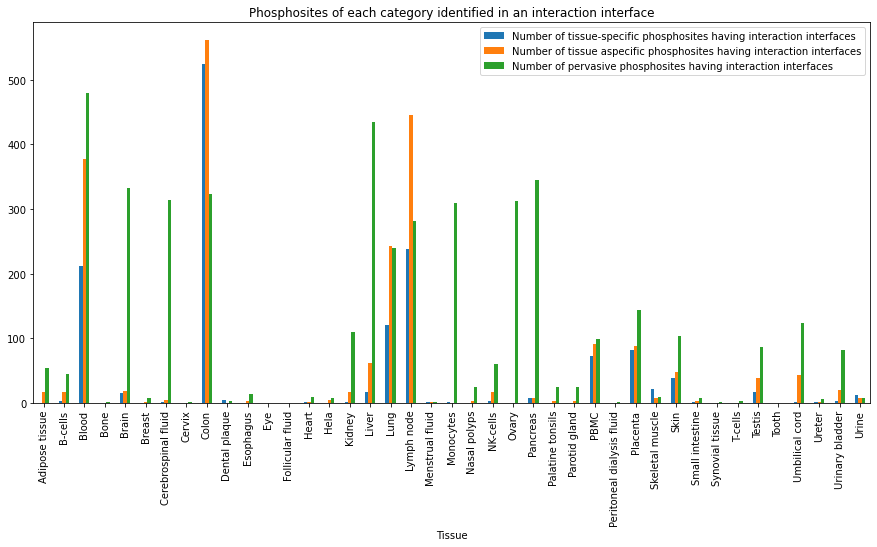

In [70]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    loc_tspec = tspec_sites_mobi.loc[tspec_sites_mobi[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_taspec = taspec_sites_mobi.loc[taspec_sites_mobi[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_gen = gen_sites_mobi.loc[gen_sites_mobi[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    count_tspec = loc_tspec["UP_POS"].count()
    count_taspec = loc_taspec["UP_POS"].count()
    count_gen = loc_gen["UP_POS"].count()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both = pd.DataFrame({"Tissue": list_tissues_STY, "Number of tissue-specific phosphosites having interaction interfaces": tspec_counts,
                             "Number of tissue aspecific phosphosites having interaction interfaces": taspec_counts,
                             "Number of pervasive phosphosites having interaction interfaces": gen_counts})
distr_tissues_both.plot(x="Tissue", kind="bar", figsize=(15,7), title="Phosphosites of each category identified in an interaction interface")

In [71]:
distr_tissues_both

,Tissue,Number of tissue-specific phosphosites having interaction interfaces,Number of tissue aspecific phosphosites having interaction interfaces,Number of pervasive phosphosites having interaction interfaces
0,Adipose tissue,0,16,54
1,B-cells,3,16,44
2,Blood,211,377,479
3,Bone,0,0,1
4,Brain,15,18,333
5,Breast,0,2,7
6,Cerebrospinal fluid,1,4,314
7,Cervix,0,0,2
8,Colon,525,561,323
9,Dental plaque,4,0,3


In [72]:
distr_tissues_both.to_csv("2.3 number of phosphosites in each category per tissue in disordered regions associated with interaction interfaces")

<AxesSubplot:title={'center':'Ratio of phosphosites indentified as lip'}, xlabel='Tissue'>

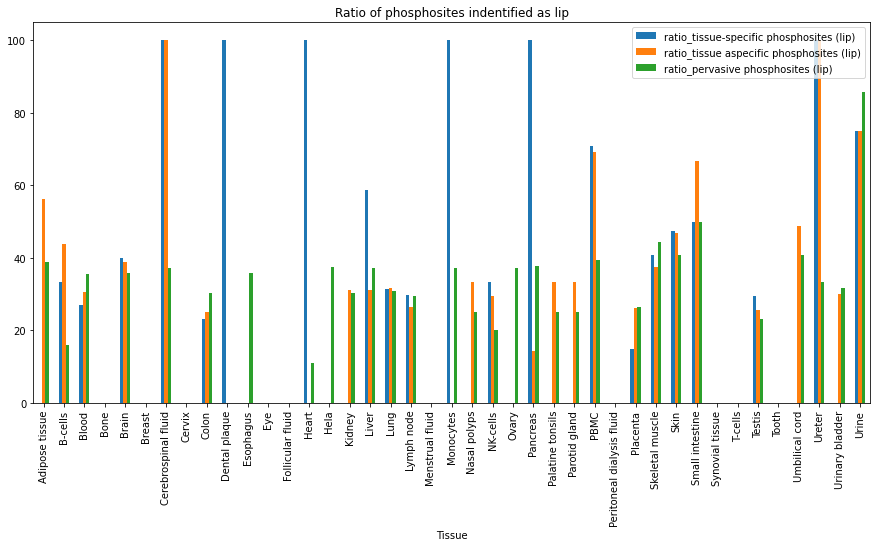

In [73]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    loc_tspec = tspec_sites_mobi.loc[((tspec_sites_mobi[tissue]==1)&(tspec_sites_mobi["feature"].str.contains("lip")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_taspec = taspec_sites_mobi.loc[((taspec_sites_mobi[tissue]==1)&(taspec_sites_mobi["feature"].str.contains("lip")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_gen = gen_sites_mobi.loc[((gen_sites_mobi[tissue]==1)&(gen_sites_mobi["feature"].str.contains("lip")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    count_tspec = loc_tspec["UP_POS"].count()
    count_taspec = loc_taspec["UP_POS"].count()
    count_gen = loc_gen["UP_POS"].count()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both["tissue-specific phosphosites (lip)"] = tspec_counts
distr_tissues_both["tissue aspecific phosphosites (lip)"] = taspec_counts
distr_tissues_both["pervasive phosphosites (lip)"] = gen_counts
distr_tissues_both["ratio_tissue-specific phosphosites (lip)"] = distr_tissues_both["tissue-specific phosphosites (lip)"]*100/distr_tissues_both["Number of tissue-specific phosphosites having interaction interfaces"]
distr_tissues_both["ratio_tissue aspecific phosphosites (lip)"] = distr_tissues_both["tissue aspecific phosphosites (lip)"]*100/distr_tissues_both["Number of tissue aspecific phosphosites having interaction interfaces"]
distr_tissues_both["ratio_pervasive phosphosites (lip)"] = distr_tissues_both["pervasive phosphosites (lip)"]*100/distr_tissues_both["Number of pervasive phosphosites having interaction interfaces"]

distr_tissues_both[["Tissue", "ratio_tissue-specific phosphosites (lip)", "ratio_tissue aspecific phosphosites (lip)",
                   "ratio_pervasive phosphosites (lip)"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Ratio of phosphosites indentified as lip")

<AxesSubplot:title={'center':'Ratio of phosphosites identified in a disorder-to-disorder region'}, xlabel='Tissue'>

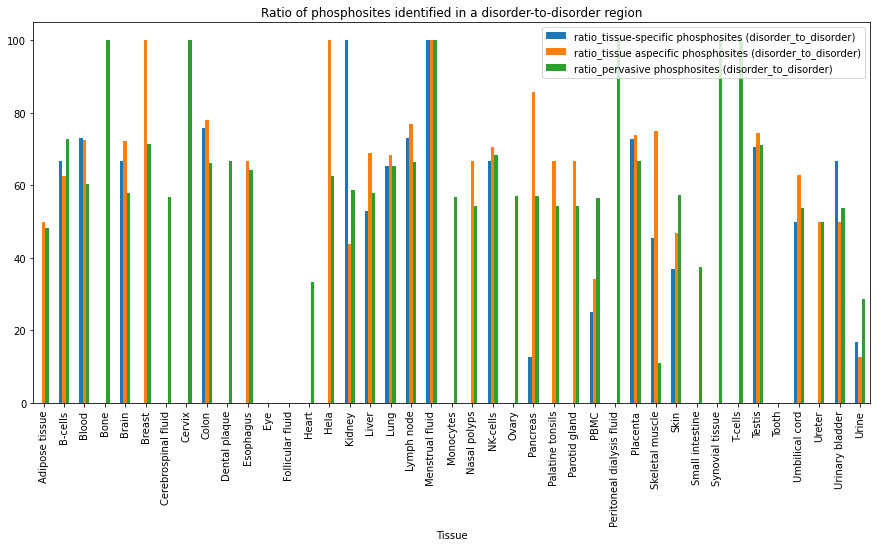

In [74]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    loc_tspec = tspec_sites_mobi.loc[((tspec_sites_mobi[tissue]==1)&(tspec_sites_mobi["feature"].str.contains("disorder_to_disorder")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_taspec = taspec_sites_mobi.loc[((taspec_sites_mobi[tissue]==1)&(taspec_sites_mobi["feature"].str.contains("disorder_to_disorder")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_gen = gen_sites_mobi.loc[((gen_sites_mobi[tissue]==1)&(gen_sites_mobi["feature"].str.contains("disorder_to_disorder")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    count_tspec = loc_tspec["UP_POS"].count()
    count_taspec = loc_taspec["UP_POS"].count()
    count_gen = loc_gen["UP_POS"].count()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both["tissue-specific phosphosites (disorder_to_disorder)"] = tspec_counts
distr_tissues_both["tissue aspecific phosphosites (disorder_to_disorder)"] = taspec_counts
distr_tissues_both["pervasive phosphosites (disorder_to_disorder)"] = gen_counts
distr_tissues_both["ratio_tissue-specific phosphosites (disorder_to_disorder)"] = distr_tissues_both["tissue-specific phosphosites (disorder_to_disorder)"]*100/distr_tissues_both["Number of tissue-specific phosphosites having interaction interfaces"]
distr_tissues_both["ratio_tissue aspecific phosphosites (disorder_to_disorder)"] = distr_tissues_both["tissue aspecific phosphosites (disorder_to_disorder)"]*100/distr_tissues_both["Number of tissue aspecific phosphosites having interaction interfaces"]
distr_tissues_both["ratio_pervasive phosphosites (disorder_to_disorder)"] = distr_tissues_both["pervasive phosphosites (disorder_to_disorder)"]*100/distr_tissues_both["Number of pervasive phosphosites having interaction interfaces"]

distr_tissues_both[["Tissue", "ratio_tissue-specific phosphosites (disorder_to_disorder)", "ratio_tissue aspecific phosphosites (disorder_to_disorder)",
                   "ratio_pervasive phosphosites (disorder_to_disorder)"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Ratio of phosphosites identified in a disorder-to-disorder region")

<AxesSubplot:title={'center':'Ratio of phosphosites identified in a disorder to order region'}, xlabel='Tissue'>

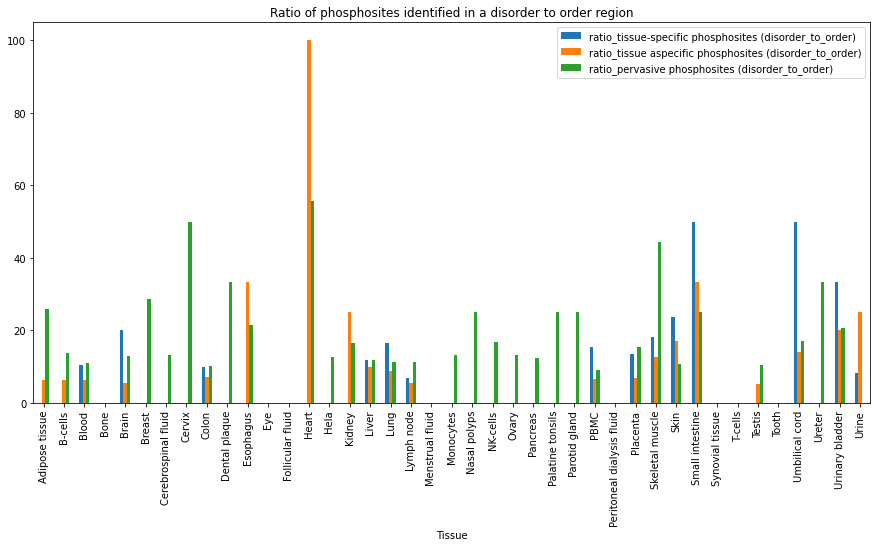

In [75]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    loc_tspec = tspec_sites_mobi.loc[((tspec_sites_mobi[tissue]==1)&(tspec_sites_mobi["feature"].str.contains("disorder_to_order")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_taspec = taspec_sites_mobi.loc[((taspec_sites_mobi[tissue]==1)&(taspec_sites_mobi["feature"].str.contains("disorder_to_order")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_gen = gen_sites_mobi.loc[((gen_sites_mobi[tissue]==1)&(gen_sites_mobi["feature"].str.contains("disorder_to_order")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    count_tspec = loc_tspec["UP_POS"].count()
    count_taspec = loc_taspec["UP_POS"].count()
    count_gen = loc_gen["UP_POS"].count()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both["tissue-specific phosphosites (disorder_to_order)"] = tspec_counts
distr_tissues_both["tissue aspecific phosphosites (disorder_to_order)"] = taspec_counts
distr_tissues_both["pervasive phosphosites (disorder_to_order)"] = gen_counts
distr_tissues_both["ratio_tissue-specific phosphosites (disorder_to_order)"] = distr_tissues_both["tissue-specific phosphosites (disorder_to_order)"]*100/distr_tissues_both["Number of tissue-specific phosphosites having interaction interfaces"]
distr_tissues_both["ratio_tissue aspecific phosphosites (disorder_to_order)"] = distr_tissues_both["tissue aspecific phosphosites (disorder_to_order)"]*100/distr_tissues_both["Number of tissue aspecific phosphosites having interaction interfaces"]
distr_tissues_both["ratio_pervasive phosphosites (disorder_to_order)"] = distr_tissues_both["pervasive phosphosites (disorder_to_order)"]*100/distr_tissues_both["Number of pervasive phosphosites having interaction interfaces"]

distr_tissues_both[["Tissue", "ratio_tissue-specific phosphosites (disorder_to_order)", "ratio_tissue aspecific phosphosites (disorder_to_order)",
                   "ratio_pervasive phosphosites (disorder_to_order)"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Ratio of phosphosites identified in a disorder to order region")

# Comparison of the ratio of disorderedness

In [76]:
tspec_sites_mobi = pd.merge(t_spec_sites, proteins_mobi, on=["ACC_ID"], how="inner")
print(tspec_sites_mobi["ACC_ID"].nunique())
taspec_sites_mobi = pd.merge(non_t_spec_sites, proteins_mobi, on=["ACC_ID"], how="inner")
print(taspec_sites_mobi["ACC_ID"].nunique())
gen_sites_mobi = pd.merge(general_P_sites, proteins_mobi, on=["ACC_ID"], how="inner")
print(gen_sites_mobi["ACC_ID"].nunique())

Uniprot = pd.read_csv("UniprotKB_GO_human_mannually annotated.tab", sep="\t")
Uniprot.rename({"Entry": "ACC_ID"}, axis=1, inplace=True)
Uniprot_mobi = pd.merge(Uniprot["ACC_ID"], mobi, on=["ACC_ID"], how="inner")
print(Uniprot_mobi["ACC_ID"].nunique())

2146
1278
652
5601


<AxesSubplot:title={'center':'Number of proteins having tissue-specific phosphosites associated with a type of annotation'}, xlabel='feature'>

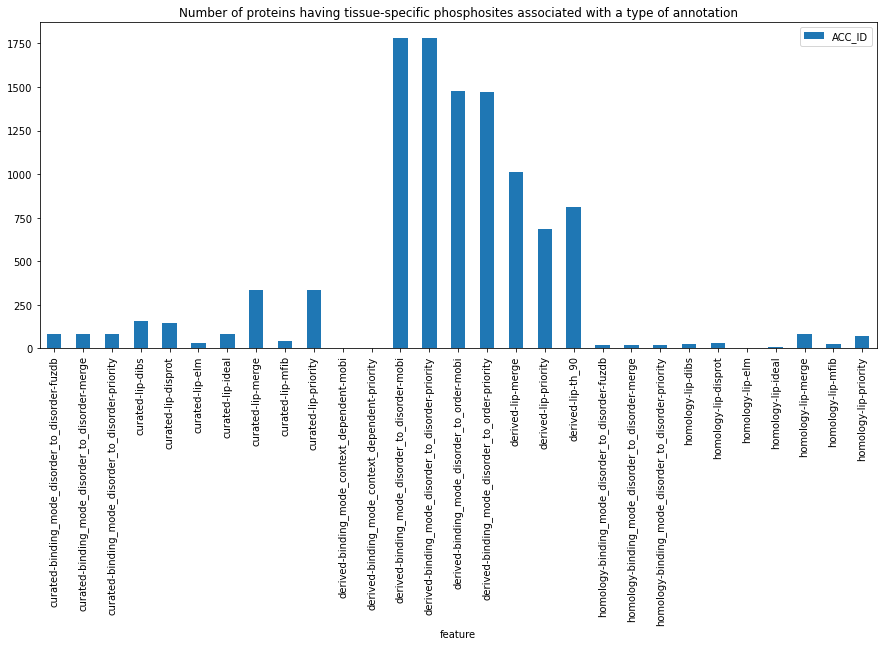

In [77]:
tspec_features = tspec_sites_mobi.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
tspec_features.plot(x="feature", kind="bar", color="tab:blue", figsize=(15,6), title="Number of proteins having tissue-specific phosphosites associated with a type of annotation")

<AxesSubplot:title={'center':'Number of proteins having tissue aspecific phosphosites associated with a type of annotation'}, xlabel='feature'>

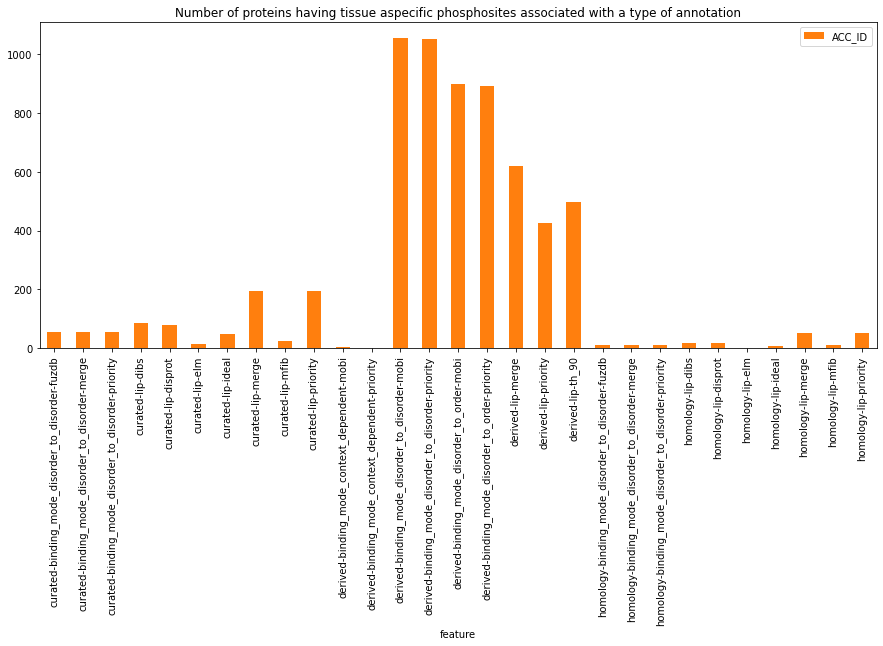

In [78]:
taspec_features = taspec_sites_mobi.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
taspec_features.plot(x="feature", kind="bar", color="tab:orange", figsize=(15,6), title="Number of proteins having tissue aspecific phosphosites associated with a type of annotation")

<AxesSubplot:title={'center':'Number of proteins having pervasive phosphosites associated with a type of annotation'}, xlabel='feature'>

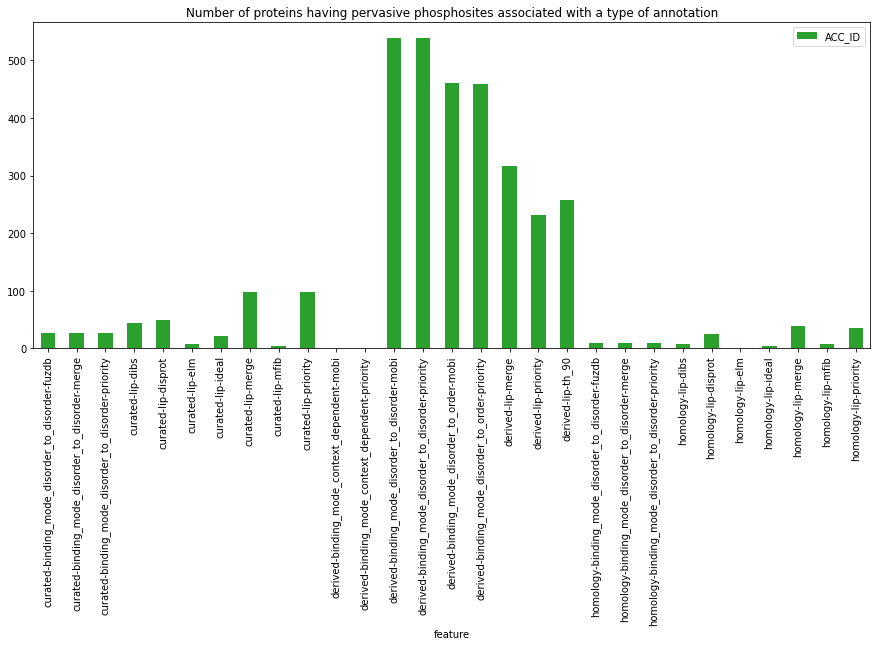

In [79]:
gen_features = gen_sites_mobi.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
gen_features.plot(x="feature", kind="bar", color="tab:green", figsize=(15,6), title="Number of proteins having pervasive phosphosites associated with a type of annotation")

<AxesSubplot:title={'center':'Number of proteins from UniProt associated with a type of annotation'}, xlabel='feature'>

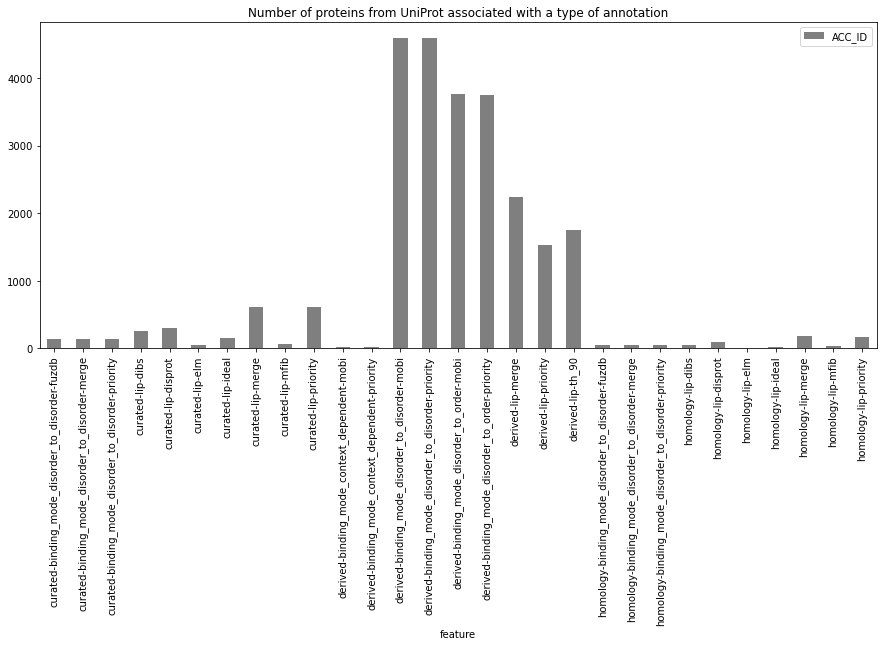

In [80]:
Uniprot_features = Uniprot_mobi.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
Uniprot_features.plot(x="feature", kind="bar", color="tab:grey", figsize=(15,6), title="Number of proteins from UniProt associated with a type of annotation")

In [81]:
print(tspec_sites_mobi["ACC_ID"].nunique()*100/Uniprot_mobi["ACC_ID"].nunique())
print(taspec_sites_mobi["ACC_ID"].nunique()*100/Uniprot_mobi["ACC_ID"].nunique())
print(gen_sites_mobi["ACC_ID"].nunique()*100/Uniprot_mobi["ACC_ID"].nunique())

38.31458668094983
22.81735404392073
11.640778432422781


<AxesSubplot:title={'center':'Ratio of proteins having a category of phosphosites per type of annotation'}, xlabel='feature'>

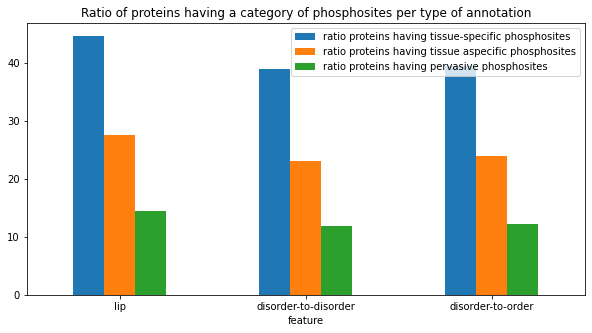

In [82]:
list_tspec = []
list_taspec = []
list_gen = []
for item in ["lip", "disorder_to_disorder", "disorder_to_order"]:
    count_item_tspec = tspec_sites_mobi.loc[tspec_sites_mobi["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_taspec = taspec_sites_mobi.loc[taspec_sites_mobi["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_gen = gen_sites_mobi.loc[gen_sites_mobi["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_Uniprot = Uniprot_mobi.loc[Uniprot_mobi["feature"].str.contains(item), "ACC_ID"].nunique()
    list_tspec.append(count_item_tspec*100/count_item_Uniprot)
    list_taspec.append(count_item_taspec*100/count_item_Uniprot)
    list_gen.append(count_item_gen*100/count_item_Uniprot)
summarised_features = pd.DataFrame({"feature": ["lip", "disorder-to-disorder", "disorder-to-order"],
                                  "ratio proteins having tissue-specific phosphosites": list_tspec,
                                  "ratio proteins having tissue aspecific phosphosites": list_taspec,
                                  "ratio proteins having pervasive phosphosites": list_gen})
summarised_features.plot(kind="bar", x="feature", figsize=(10,5), title="Ratio of proteins having a category of phosphosites per type of annotation", rot=0)
#plt.savefig("WP2 MobiDB interaction interfaces all phosphosites.png", format="png", bbox_inches="tight")

# Comparison of proteins having tissue-specific phosphosites

In [83]:
tspec_proteins = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
print(tspec_proteins.shape[0])
taspec_proteins = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
print(taspec_proteins.shape[0])
gen_proteins = pd.read_csv("1.1 general P proteins", sep="\t")
print(gen_proteins.shape[0])

2029
2074
1752


In [84]:
tspec_sites_mobi = pd.merge(t_spec_sites, proteins_mobi_sub_tot, on=["ACC_ID", "UP_POS"], how="inner")
tspecsites_tspecproteins_mobi = pd.merge(tspec_sites_mobi, tspec_proteins["ACC_ID"], on=["ACC_ID"], how="inner")
print(tspecsites_tspecproteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspecsites_tspecproteins_mobi["ACC_ID"].nunique())
tspecsites_tspecproteins_mobi.head()

238
177


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A4D2B0,61,"Brain,Brain",S,0,0,0,0,1,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-mobi,"1..1,52..66,240..266",0.162,43,266
1,A4D2B0,61,"Brain,Brain",S,0,0,0,0,1,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-prio...,"1..1,52..66,240..266",0.162,43,266
2,O00268,1027,Blood,S,0,0,1,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-mobi,"1..582,680..836,1013..1052",0.718,779,1085
3,O00268,1027,Blood,S,0,0,1,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-prio...,"1..582,680..836,1013..1052",0.718,779,1085
4,O14733,60,Blood,S,0,0,1,0,0,0,...,0,0,0,0,1,curated-lip-disprot,30..100,0.169,71,419


In [85]:
tspecsites_taspecproteins_mobi = pd.merge(tspec_sites_mobi, taspec_proteins["ACC_ID"], on=["ACC_ID"], how="inner")
print(tspecsites_taspecproteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspecsites_taspecproteins_mobi["ACC_ID"].nunique())
tspecsites_taspecproteins_mobi.head()

463
245


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0JLT2,192,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-mobi,"1..62,165..244",0.582,142,244
1,A0JLT2,192,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-prio...,"1..62,165..244",0.582,142,244
2,A0JLT2,194,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-mobi,"1..62,165..244",0.582,142,244
3,A0JLT2,194,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-prio...,"1..62,165..244",0.582,142,244
4,A0JLT2,234,Blood,S,0,0,1,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-mobi,"1..62,165..244",0.582,142,244


In [86]:
tspecsites_genproteins_mobi = pd.merge(tspec_sites_mobi, gen_proteins["ACC_ID"], on=["ACC_ID"], how="inner")
print(tspecsites_genproteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspecsites_genproteins_mobi["ACC_ID"].nunique())
tspecsites_genproteins_mobi.head()

700
246


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A6NMY6,31,Skin,T,0,0,0,0,0,0,...,0,0,0,0,1,homology-lip-disprot,2..33,0.094,32,339
1,A6NMY6,31,Skin,T,0,0,0,0,0,0,...,0,0,0,0,1,homology-lip-merge,1..33,0.097,33,339
2,A6NMY6,31,Skin,T,0,0,0,0,0,0,...,0,0,0,0,1,homology-lip-priority,1..33,0.097,33,339
3,O00267,670,"Colon,Colon,Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-mobi,"1..175,319..334,397..415,648..693,768..770,791...",0.407,442,1087
4,O00267,670,"Colon,Colon,Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,0,0,0,0,1,derived-binding_mode_disorder_to_disorder-prio...,"1..175,319..334,397..415,648..693,768..770,791...",0.407,442,1087


<AxesSubplot:title={'center':'Ratio phosphosites associated with each of the three major categories of annotation'}, xlabel='feature'>

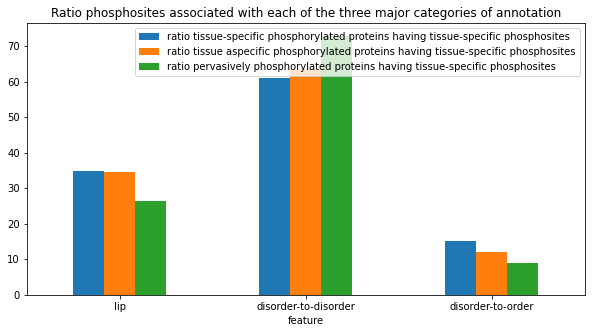

In [87]:
list_tspec = []
list_taspec = []
list_gen = []
for item in ["lip", "disorder_to_disorder", "disorder_to_order"]:
    count_item_tspec = tspecsites_tspecproteins_mobi.loc[tspecsites_tspecproteins_mobi["feature"].str.contains(item), :].groupby(["ACC_ID", "UP_POS"],as_index=False)["length"].mean()["UP_POS"].count()
    count_item_taspec = tspecsites_taspecproteins_mobi.loc[tspecsites_taspecproteins_mobi["feature"].str.contains(item), :].groupby(["ACC_ID", "UP_POS"],as_index=False)["length"].mean()["UP_POS"].count()
    count_item_gen = tspecsites_genproteins_mobi.loc[tspecsites_genproteins_mobi["feature"].str.contains(item), :].groupby(["ACC_ID", "UP_POS"],as_index=False)["length"].mean()["UP_POS"].count()
    list_tspec.append(count_item_tspec*100/tspecsites_tspecproteins_mobi.groupby(["ACC_ID", "UP_POS"],as_index=False)["length"].mean()["UP_POS"].count())
    list_taspec.append(count_item_taspec*100/tspecsites_taspecproteins_mobi.groupby(["ACC_ID", "UP_POS"],as_index=False)["length"].mean()["UP_POS"].count())
    list_gen.append(count_item_gen*100/tspecsites_genproteins_mobi.groupby(["ACC_ID", "UP_POS"],as_index=False)["length"].mean()["UP_POS"].count())
summarised_features = pd.DataFrame({"feature": ["lip", "disorder-to-disorder", "disorder-to-order"],
                                  "ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites": list_tspec,
                                  "ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites": list_taspec,
                                  "ratio pervasively phosphorylated proteins having tissue-specific phosphosites": list_gen})
summarised_features.plot(kind="bar", x="feature", figsize=(10,5), title="Ratio phosphosites associated with each of the three major categories of annotation", rot=0)

<AxesSubplot:title={'center':'Number of phosphosites occuring in an interaction interface per tissue'}, xlabel='Tissue'>

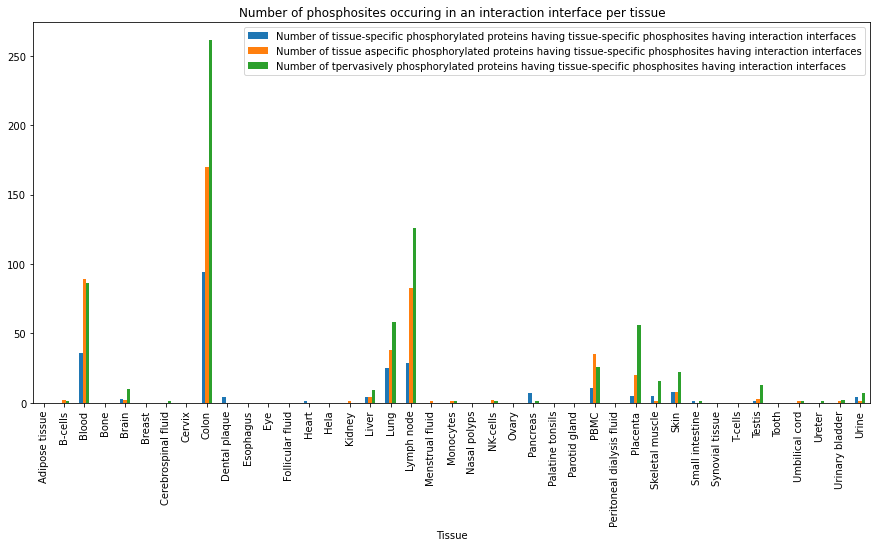

In [88]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    loc_tspec = tspecsites_tspecproteins_mobi.loc[tspecsites_tspecproteins_mobi[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_taspec = tspecsites_taspecproteins_mobi.loc[tspecsites_taspecproteins_mobi[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_gen = tspecsites_genproteins_mobi.loc[tspecsites_genproteins_mobi[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    count_tspec = loc_tspec["UP_POS"].count()
    count_taspec = loc_taspec["UP_POS"].count()
    count_gen = loc_gen["UP_POS"].count()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both = pd.DataFrame({"Tissue": list_tissues_STY, "Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites having interaction interfaces": tspec_counts,
                             "Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites having interaction interfaces": taspec_counts,
                             "Number of tpervasively phosphorylated proteins having tissue-specific phosphosites having interaction interfaces": gen_counts})
distr_tissues_both.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphosites occuring in an interaction interface per tissue")

<AxesSubplot:title={'center':'Ratio phosphosites associated with lip'}, xlabel='Tissue'>

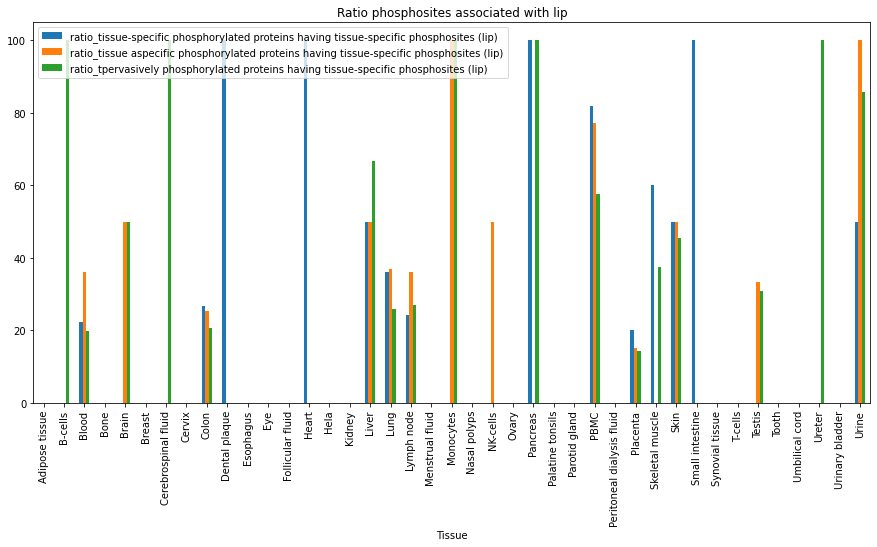

In [89]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    loc_tspec = tspecsites_tspecproteins_mobi.loc[((tspecsites_tspecproteins_mobi[tissue]==1)&(tspecsites_tspecproteins_mobi["feature"].str.contains("lip")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_taspec = tspecsites_taspecproteins_mobi.loc[((tspecsites_taspecproteins_mobi[tissue]==1)&(tspecsites_taspecproteins_mobi["feature"].str.contains("lip")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_gen = tspecsites_genproteins_mobi.loc[((tspecsites_genproteins_mobi[tissue]==1)&(tspecsites_genproteins_mobi["feature"].str.contains("lip")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    count_tspec = loc_tspec["UP_POS"].count()
    count_taspec = loc_taspec["UP_POS"].count()
    count_gen = loc_gen["UP_POS"].count()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both["tissue-specific phosphorylated proteins having tissue-specific phosphosites (lip)"] = tspec_counts
distr_tissues_both["tissue aspecific phosphorylated proteins having tissue-specific phosphosites (lip)"] = taspec_counts
distr_tissues_both["tpervasively phosphorylated proteins having tissue-specific phosphosites (lip)"] = gen_counts
distr_tissues_both["ratio_tissue-specific phosphorylated proteins having tissue-specific phosphosites (lip)"] = distr_tissues_both["tissue-specific phosphorylated proteins having tissue-specific phosphosites (lip)"]*100/distr_tissues_both["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites having interaction interfaces"]
distr_tissues_both["ratio_tissue aspecific phosphorylated proteins having tissue-specific phosphosites (lip)"] = distr_tissues_both["tissue aspecific phosphorylated proteins having tissue-specific phosphosites (lip)"]*100/distr_tissues_both["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites having interaction interfaces"]
distr_tissues_both["ratio_tpervasively phosphorylated proteins having tissue-specific phosphosites (lip)"] = distr_tissues_both["tpervasively phosphorylated proteins having tissue-specific phosphosites (lip)"]*100/distr_tissues_both["Number of tpervasively phosphorylated proteins having tissue-specific phosphosites having interaction interfaces"]

distr_tissues_both[["Tissue", "ratio_tissue-specific phosphorylated proteins having tissue-specific phosphosites (lip)", "ratio_tissue aspecific phosphorylated proteins having tissue-specific phosphosites (lip)",
                   "ratio_tpervasively phosphorylated proteins having tissue-specific phosphosites (lip)"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Ratio phosphosites associated with lip")

<AxesSubplot:title={'center':'Ratio phosphosites occuring in a region transitioning from disorder-to-disorder'}, xlabel='Tissue'>

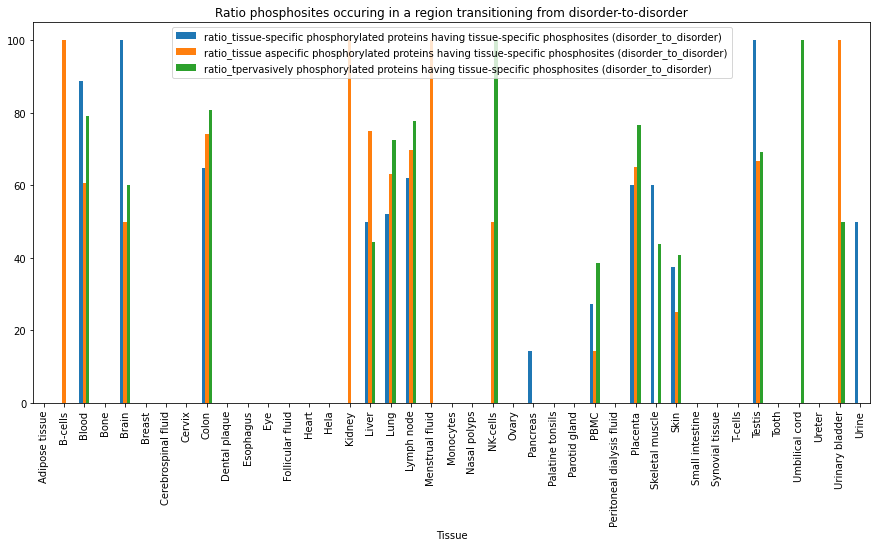

In [90]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    loc_tspec = tspecsites_tspecproteins_mobi.loc[((tspecsites_tspecproteins_mobi[tissue]==1)&(tspecsites_tspecproteins_mobi["feature"].str.contains("disorder_to_disorder")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_taspec = tspecsites_taspecproteins_mobi.loc[((tspecsites_taspecproteins_mobi[tissue]==1)&(tspecsites_taspecproteins_mobi["feature"].str.contains("disorder_to_disorder")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_gen = tspecsites_genproteins_mobi.loc[((tspecsites_genproteins_mobi[tissue]==1)&(tspecsites_genproteins_mobi["feature"].str.contains("disorder_to_disorder")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    count_tspec = loc_tspec["UP_POS"].count()
    count_taspec = loc_taspec["UP_POS"].count()
    count_gen = loc_gen["UP_POS"].count()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both["tissue-specific phosphorylated proteins having tissue-specific phosphosites (disorder_to_disorder)"] = tspec_counts
distr_tissues_both["tissue aspecific phosphorylated proteins having tissue-specific phosphosites (disorder_to_disorder)"] = taspec_counts
distr_tissues_both["tpervasively phosphorylated proteins having tissue-specific phosphosites (disorder_to_disorder)"] = gen_counts
distr_tissues_both["ratio_tissue-specific phosphorylated proteins having tissue-specific phosphosites (disorder_to_disorder)"] = distr_tissues_both["tissue-specific phosphorylated proteins having tissue-specific phosphosites (disorder_to_disorder)"]*100/distr_tissues_both["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites having interaction interfaces"]
distr_tissues_both["ratio_tissue aspecific phosphorylated proteins having tissue-specific phosphosites (disorder_to_disorder)"] = distr_tissues_both["tissue aspecific phosphorylated proteins having tissue-specific phosphosites (disorder_to_disorder)"]*100/distr_tissues_both["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites having interaction interfaces"]
distr_tissues_both["ratio_tpervasively phosphorylated proteins having tissue-specific phosphosites (disorder_to_disorder)"] = distr_tissues_both["tpervasively phosphorylated proteins having tissue-specific phosphosites (disorder_to_disorder)"]*100/distr_tissues_both["Number of tpervasively phosphorylated proteins having tissue-specific phosphosites having interaction interfaces"]

distr_tissues_both[["Tissue", "ratio_tissue-specific phosphorylated proteins having tissue-specific phosphosites (disorder_to_disorder)", "ratio_tissue aspecific phosphorylated proteins having tissue-specific phosphosites (disorder_to_disorder)",
                   "ratio_tpervasively phosphorylated proteins having tissue-specific phosphosites (disorder_to_disorder)"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Ratio phosphosites occuring in a region transitioning from disorder-to-disorder")

<AxesSubplot:title={'center':'Ratio phosphosites occuring in a region transitioning from disorder to order'}, xlabel='Tissue'>

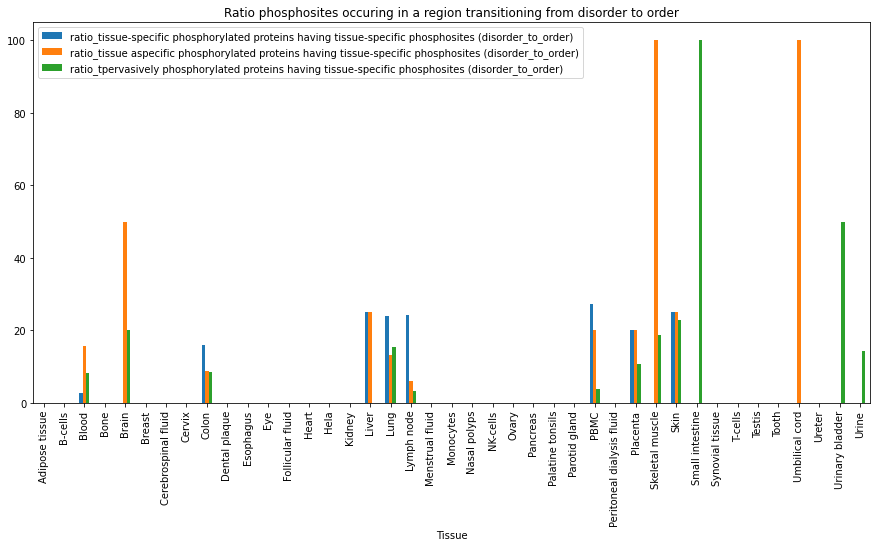

In [91]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    loc_tspec = tspecsites_tspecproteins_mobi.loc[((tspecsites_tspecproteins_mobi[tissue]==1)&(tspecsites_tspecproteins_mobi["feature"].str.contains("disorder_to_order")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_taspec = tspecsites_taspecproteins_mobi.loc[((tspecsites_taspecproteins_mobi[tissue]==1)&(tspecsites_taspecproteins_mobi["feature"].str.contains("disorder_to_order")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_gen = tspecsites_genproteins_mobi.loc[((tspecsites_genproteins_mobi[tissue]==1)&(tspecsites_genproteins_mobi["feature"].str.contains("disorder_to_order")))].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    count_tspec = loc_tspec["UP_POS"].count()
    count_taspec = loc_taspec["UP_POS"].count()
    count_gen = loc_gen["UP_POS"].count()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both["tissue-specific phosphorylated proteins having tissue-specific phosphosites (disorder_to_order)"] = tspec_counts
distr_tissues_both["tissue aspecific phosphorylated proteins having tissue-specific phosphosites (disorder_to_order)"] = taspec_counts
distr_tissues_both["tpervasively phosphorylated proteins having tissue-specific phosphosites (disorder_to_order)"] = gen_counts
distr_tissues_both["ratio_tissue-specific phosphorylated proteins having tissue-specific phosphosites (disorder_to_order)"] = distr_tissues_both["tissue-specific phosphorylated proteins having tissue-specific phosphosites (disorder_to_order)"]*100/distr_tissues_both["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites having interaction interfaces"]
distr_tissues_both["ratio_tissue aspecific phosphorylated proteins having tissue-specific phosphosites (disorder_to_order)"] = distr_tissues_both["tissue aspecific phosphorylated proteins having tissue-specific phosphosites (disorder_to_order)"]*100/distr_tissues_both["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites having interaction interfaces"]
distr_tissues_both["ratio_tpervasively phosphorylated proteins having tissue-specific phosphosites (disorder_to_order)"] = distr_tissues_both["tpervasively phosphorylated proteins having tissue-specific phosphosites (disorder_to_order)"]*100/distr_tissues_both["Number of tpervasively phosphorylated proteins having tissue-specific phosphosites having interaction interfaces"]

distr_tissues_both[["Tissue", "ratio_tissue-specific phosphorylated proteins having tissue-specific phosphosites (disorder_to_order)", "ratio_tissue aspecific phosphorylated proteins having tissue-specific phosphosites (disorder_to_order)",
                   "ratio_tpervasively phosphorylated proteins having tissue-specific phosphosites (disorder_to_order)"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Ratio phosphosites occuring in a region transitioning from disorder to order")

# Comparison wiht UniProtKB

In [92]:
tspec_sites_mobi = pd.merge(t_spec_sites, proteins_mobi, on=["ACC_ID", "UP_POS"], how="inner")
tspecsites_tspecproteins_mobi = pd.merge(tspec_sites_mobi, tspec_proteins["ACC_ID"], on=["ACC_ID"], how="inner")
print(tspecsites_tspecproteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspecsites_tspecproteins_mobi["ACC_ID"].nunique())
tspecsites_tspecproteins_mobi.head()

1017
710


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,22,23,24,25,26,27,28,29,30,31
0,A4D1P6,264,Lymph node,S,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
1,A4D1P6,264,Lymph node,S,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
2,A4D2B0,61,"Brain,Brain",S,0,0,0,0,1,0,...,None,None,None,None,None,None,None,None,None,None
3,A4D2B0,61,"Brain,Brain",S,0,0,0,0,1,0,...,None,None,None,None,None,None,None,None,None,None
4,A4D2B0,61,"Brain,Brain",S,0,0,0,0,1,0,...,None,None,None,None,None,None,None,None,None,None


In [93]:
tspecsites_taspecproteins_mobi = pd.merge(tspec_sites_mobi, taspec_proteins["ACC_ID"], on=["ACC_ID"], how="inner")
print(tspecsites_taspecproteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspecsites_taspecproteins_mobi["ACC_ID"].nunique())
tspecsites_taspecproteins_mobi.head()

2239
731


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,22,23,24,25,26,27,28,29,30,31
0,A0AVK6,68,"Colon,Colon,Colon",S,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
1,A0AVK6,68,"Colon,Colon,Colon",S,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
2,A0JLT2,192,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
3,A0JLT2,192,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
4,A0JLT2,192,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [94]:
tspecsites_genproteins_mobi = pd.merge(tspec_sites_mobi, gen_proteins["ACC_ID"], on=["ACC_ID"], how="inner")
print(tspecsites_genproteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspecsites_genproteins_mobi["ACC_ID"].nunique())
tspecsites_genproteins_mobi.head()

3423
705


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,22,23,24,25,26,27,28,29,30,31
0,A0FGR8,736,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
1,A0FGR8,736,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
2,A0FGR8,736,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
3,A0FGR8,736,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
4,A0FGR8,736,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [95]:
print(Uniprot_mobi["ACC_ID"].nunique())


5601


<AxesSubplot:title={'center':'Ratio phosphosites associated with each of the three major categories of annotation'}, xlabel='feature'>

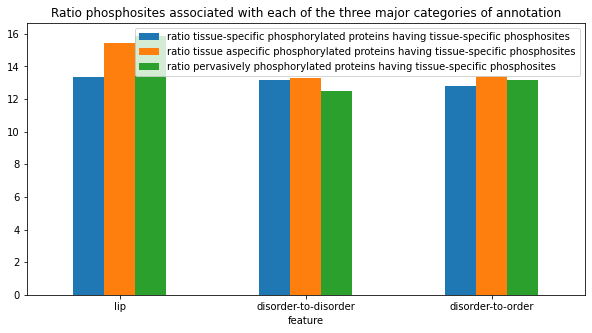

In [96]:
list_tspec = []
list_taspec = []
list_gen = []
for item in ["lip", "disorder_to_disorder", "disorder_to_order"]:
    count_item_tspec = tspecsites_tspecproteins_mobi.loc[tspecsites_tspecproteins_mobi["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_taspec = tspecsites_taspecproteins_mobi.loc[tspecsites_taspecproteins_mobi["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_gen = tspecsites_genproteins_mobi.loc[tspecsites_genproteins_mobi["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_uniprot = Uniprot_mobi.loc[Uniprot_mobi["feature"].str.contains(item),"ACC_ID"].nunique()
    list_tspec.append(count_item_tspec*100/count_item_uniprot)
    list_taspec.append(count_item_taspec*100/count_item_uniprot)
    list_gen.append(count_item_gen*100/count_item_uniprot)
summarised_features = pd.DataFrame({"feature": ["lip", "disorder-to-disorder", "disorder-to-order"],
                                  "ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites": list_tspec,
                                  "ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites": list_taspec,
                                  "ratio pervasively phosphorylated proteins having tissue-specific phosphosites": list_gen})
summarised_features.plot(kind="bar", x="feature", figsize=(10,5), title="Ratio phosphosites associated with each of the three major categories of annotation", rot=0)
#plt.savefig("WP2 MobiDB_Ratio proteins having tissue-specific phosphosites interaction interface.png", format="png", bbox_inches="tight")